# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [1]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

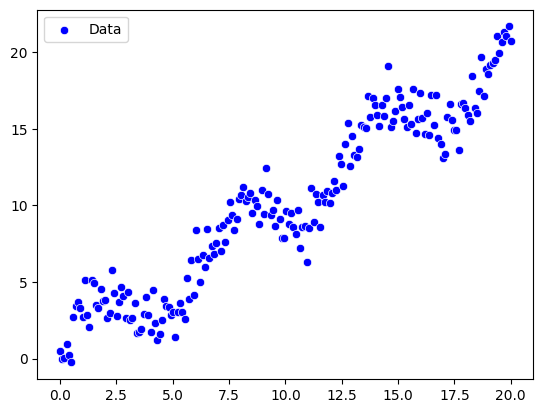

In [2]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [3]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [4]:
df = Simple1DRegressionDataset(X,y)


In [5]:
df[0]


(tensor([0.]), tensor([0.4869]))

In [6]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [7]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[8.7719]])]

In [8]:
# construct the model using Linear block
in_features = 1
out_features = 1
model_2 = nn.Linear(in_features,out_features)


In [9]:
in_features = 1
out_features = 1

model_2 = nn.Sequential(
    nn.Linear(in_features , 128),
    nn.ReLU(),
    nn.Linear(128 , 64),
    nn.ReLU(),
    nn.Linear(64,16),
    nn.ReLU(),
    nn.Linear(16 , out_features),
)

In [10]:
loss_fn = nn.MSELoss()

In [11]:
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [12]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)



<ipython-input-12-f3caa4f47508>:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [13]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [14]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=100
                )


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

155.46286010742188
193.29872131347656
220.1783618927002
225.04371404647827
232.15562772750854
234.5723602771759
238.53811311721802
352.4065899848938
1589.9423565864563
1589.9641986824572
1704.0902515389025
1975.3809619881213
2192.6160846687853
2210.628190610558
2644.881394956261
2649.9808188416064
2657.3262153603137
2878.345105741173
3067.3063636757433
3364.251828763634
3377.1444259621203
3441.0690322853625
3522.6595550514758
3764.194284055382
3764.7638597227633
3983.7333879210055
4106.701184246689
4313.701062176377
4422.377911541611
4785.102276775986
4876.068158123642
4931.143723461777
5156.541642162949
5227.211312267929
5393.753975842148
5491.323761913925
5715.737000439316
5955.901947949082
6128.243576977402
6128.836221788079
6519.178598497063
6854.828256700188
6857.103529307991
6990.149412486702
7315.667784068733
7316.036812607199
7388.685311142355
7396.427605453879
7459.618714157492
7475.378784958273
7475.4454083405435
7623.950947280973
7696.318974014372
7696.991519745439
7787.0885

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.185091495513916
20.462460041046143
60.706711292266846
95.23358583450317
97.95813846588135
99.04415655136108
116.66258764266968
165.18380498886108
251.44954442977905
272.4171748161316
279.38911056518555
350.0837821960449
396.0582962036133
426.2346935272217
426.23679066216573
451.4721937230788
494.667307858821
511.769171719905
613.0334997228347
654.9619092992507
674.1850347570144
676.0170083097182
694.261389260646
730.4281220487319
785.7209382108413
810.7234463742934
857.5580105832778
895.685871606227
895.7405509627424
919.3087749159895
919.3311453848146
925.8210187940858
939.0989070921205
997.5421405821107
1019.8702388792299
1026.2731958418153
1027.1423819451593
1084.005831041839
1146.6241782098077
1178.450290957
1218.629387178924
1225.6614411263727
1227.877797642257
1280.9445815472864
1352.7031951337121
1427.8837752728723
1459.2450938611291
1486.8665557294153
1537.5828071027063
1668.3843512921594
1719.2738891034387
1748.9622359662317
1832.325006046798
1832.992698290851
1836.150466063

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.46836626529693604
2.795785069465637
70.34780991077423
70.689757168293
166.6678836941719
177.27265912294388
183.04241639375687
302.3697708249092
352.7664116024971
422.7147453427315
435.0839288830757
525.8291299939156
571.9539774060249
640.2337549328804
648.4491909146309
660.6223304867744
669.5144975781441
674.3031719326973
702.5438068509102
721.268557369709
834.8667858242989
885.1490886807442
887.8245571255684
936.1637142300606
939.3675068020821
954.1607645153999
1035.182035267353
1056.8541734814644
1084.99222356081
1089.7024214863777
1154.3628218770027
1264.5763381123543
1283.8293974995613
1327.9743788838387
1367.5671675801277
1367.5761022586375
1400.0627622622997
1400.0849360376596
1468.3581446558237
1487.0159281641245
1559.6866511255503
1608.0641077905893
1608.068305876106
1674.5911940596998
1705.6068171523511
1706.740911271423
1754.95694520697
1816.1641366742551
1850.8749482892454
1897.606904771179
1960.0147378705442
1984.2837236188352
2010.8524759076536
2012.2939452193677
2040.25

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

8.451905250549316
30.927748680114746
88.42990016937256
95.73178958892822
139.1770143508911
178.39946460723877
261.42594623565674
300.18010425567627
306.4127378463745
306.8998086452484
339.0295579433441
339.04757528938353
383.9167845789343
449.0326445642859
499.71010809578
572.1168845240027
624.2572005335242
649.9923060480505
696.4285319391638
728.4042056147009
782.0531352106482
782.2625361327082
823.0587168578058
823.3317062202841
824.2796615306288
854.5200847331434
877.4214824382216
950.726894730702
1005.3949855510145
1038.3836826030165
1040.590855712071
1070.9066554252058
1070.906677155348
1071.6471018479788
1198.1476816819631
1251.5193209336721
1263.9913878129446
1339.4886870072805
1417.621377436968
1418.6120646284544
1463.0060351179563
1526.5133211897337
1526.6462225006544
1554.1835683868849
1597.4358648346388
1601.524425415846
1615.6036957787
1650.6795853661024
1653.60755506024
1654.5081911371672
1723.9539842890226
1748.0428419397795
1782.54055312142
1805.702122716757
1830.3151483

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

182.46365356445312
182.54193703085184
182.55529887229204
182.56566186249256
182.6118895933032
281.3330275937915
564.625141851604
739.8572890684009
971.3611800596118
971.8588620349765
973.272819750011
1131.0274126455188
1185.8474390432239
1234.02816414088
1572.3680689260364
1698.1514856740832
1698.6208477839828
1699.0510791763663
1726.4209808334708
1922.3322814926505
1922.462256424129
1932.6486205980182
2071.7427062913775
2157.973182670772
2158.107075281441
2158.5066764727235
2241.8650749102235
2241.9310739040375
2539.5263497829437
2643.06099486351
2668.7646386623383
2695.330697774887
2698.9738371372223
2851.4870207309723
2876.630430459976
3045.53076004982
3229.0145094394684
3322.048597574234
3373.4284269809723
3386.2503407001495
3423.0263607501984
3434.2420065402985
3479.255510568619
3482.397251844406
3531.1908042430878
3535.1239473819733
3845.045730829239
3862.4114305973053
3911.111362695694
4086.5223581790924
4111.822958230972
4291.329077005386
4309.741564035416
4311.798135519028
453

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

12.196782112121582
14.205976963043213
24.949065685272217
151.58517408370972
289.4680323600769
312.12039136886597
407.54687452316284
409.2726401090622
422.5726355314255
423.2627541422844
429.9674283862114
431.3697699904442
544.6217536330223
666.3721579909325
685.3215693831444
777.7008265852928
781.9492673277855
1030.0719174742699
1237.5093716979027
1240.545368373394
1361.2480432391167
1367.9920589327812
1473.992715060711
1550.2207271456718
1564.1387216448784
1694.1912271380424
1950.0501901507378
1960.2001821398735
1967.4860555529594
1977.537908732891
1987.4247924685478
2003.6462299227715
2003.9677983224392
2007.585298627615
2037.537597745657
2126.572395414114
2232.1288834512234
2254.0999661386013
2394.4530545175076
2424.772813886404
2426.424180597067
2512.940423578024
2517.2509213387966
2578.478780835867
2672.8698483407497
2773.333433240652
2818.5963345468044
2837.1300526559353
2891.8768711984158
3005.9814854562283
3087.8368550240993
3104.186014264822
3217.1880055367947
3291.55451402068

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.7890992164611816
11.426549434661865
90.21231603622437
92.71580576896667
161.72535014152527
178.9635875225067
190.4447362422943
190.6819772273302
277.85281462967396
433.54026885330677
436.7331988364458
455.88695974648
466.91235037148
520.8809935599566
537.0824915915728
539.0018797665834
552.1840391904116
633.5459929257631
643.4069071561098
654.3788777142763
662.7773524075747
664.0035719424486
860.4405378848314
971.0079588443041
991.9362616091967
1000.828385785222
1082.5668348819017
1155.046876385808
1355.7079023867846
1367.7674173861742
1433.1578363925219
1471.518592312932
1472.0519721060991
1472.0792605448514
1655.0021884012967
1717.428705887869
1805.1482569742948
1889.3828150797635
1889.5864795763046
1900.216053398326
1924.5479740221053
1937.206321151927
1952.9657501298934
1964.7042135316879
2016.5545171815902
2152.6444524843246
2154.9482976514846
2256.798975141719
2265.7619430143386
2297.8624450284988
2306.8298560697585
2312.470132501796
2322.493491800502
2331.271396311
2417.343120

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

61.09417724609375
61.47096931934357
62.028990030288696
109.57763504981995
168.84684586524963
176.88462281227112
177.393288731575
185.5746375322342
210.31560814380646
212.34672152996063
390.0567282438278
397.39751040935516
506.25221621990204
524.3217371702194
533.1783856153488
565.1343411207199
580.394061923027
590.5661686658859
615.3081730604172
655.7618931531906
675.0302532911301
677.1442805528641
693.1469737291336
712.1747828722
795.3362208604813
795.9192990660667
856.1819791197777
856.3679487705231
928.6774961948395
956.3163416385651
995.6917650699615
1118.7789843082428
1242.276817560196
1271.0038073062897
1303.7402040958405
1362.884212732315
1374.6174290180206
1396.2344677448273
1427.585543870926
1463.1222984790802
1560.7451241016388
1591.674649477005
1646.2288029193878
1695.7223751544952
1833.9238827228546
1990.2091763019562
1990.3289614096284
2045.7583589926362
2097.3333750143647
2127.9664106741548
2132.261667765677
2157.949644602835
2157.988845374435
2159.9494264386594
2169.3437

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

81.6288070678711
108.55684089660645
121.95034217834473
143.58884239196777
146.51841473579407
199.96273159980774
252.0195095539093
283.09129643440247
289.0063202381134
362.9233887195587
423.44199299812317
594.9816963672638
600.729186296463
679.4446938037872
707.760623216629
771.7685730457306
776.6772916316986
842.4930646419525
843.5819826126099
877.7829904556274
941.292950630188
942.5464426279068
943.2118364572525
964.407723069191
976.2958942651749
979.4567574262619
979.457100465137
1022.5155339978519
1070.2420469067874
1144.2456098340335
1256.2348829053226
1319.2104345105472
1321.7061682484928
1431.2055502675357
1434.1691039346042
1470.421614005405
1470.4272223950247
1506.8602859021048
1531.8075229168753
1556.4167968273978
1599.6007606030325
1600.8458296299796
1644.8124815464835
1700.1469923497061
1709.0366569996695
1726.0938812733511
1744.7643429280142
1767.4486996174674
1787.661555910192
1787.8291837812285
1792.4817015767912
1839.7982985616545
1855.1350009084563
1974.230986321054
201

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.3863518238067627
136.26745533943176
165.94335865974426
220.3923065662384
220.80746284127235
285.5045682489872
295.40660682320595
297.8595065176487
336.93640318512917
337.2232845425606
339.8708785176277
385.71933966875076
391.04455786943436
416.7903864979744
462.73130828142166
463.9892951846123
465.15052622556686
501.8891240954399
544.1662923693657
648.5648595690727
702.1125814318657
788.7364751696587
792.0598561167717
807.469600379467
850.6076580882072
883.3515087962151
883.6924217939377
938.9519432783127
1005.9597252607346
1035.4520443677902
1035.7338809669018
1082.0904407203197
1123.7794208228588
1123.9674797803164
1123.9753871606663
1138.7943769143894
1187.2753072427586
1204.4700399087742
1260.7163358377293
1273.6428104089573
1307.019385878928
1338.4481712030247
1338.5416466193274
1342.2500082449988
1383.8677374320105
1423.9981619315222
1476.9982382254675
1501.1337458090857
1564.7438227133825
1636.9243723349646
1666.5267988638952
1692.239576955326
1770.7983614401892
1822.568949361

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

11.861321449279785
72.94429111480713
73.01500338315964
154.2641412615776
156.61348313093185
159.66225332021713
191.9690961241722
214.46351712942123
246.92109388113022
247.58927088975906
301.3959954380989
361.60187846422195
460.30097514390945
481.7854760289192
509.5866578221321
555.3793290257454
597.6916688084602
656.500705063343
658.0269493460655
697.4055733084679
749.1736778616905
768.8937324881554
802.3046211600304
803.273806810379
804.4072754383087
805.2683841586113
857.6772243380547
857.7905651926994
893.181010901928
916.7928406596184
957.7634217143059
1044.0789124369621
1071.889865577221
1071.9062987528741
1097.1850634776056
1140.3278819285333
1167.5693446360528
1233.6784220896661
1361.5934535227716
1375.0445166788995
1407.5803328715265
1472.1941024027765
1515.787573929876
1546.3032790385187
1584.8012801371515
1632.5958625040948
1666.1683264933527
1666.23430833593
1668.4727874733508
1702.433469388634
1812.7457862831652
1856.835568998009
1860.5799451805651
1895.1286397911608
1897.4

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

8.689604759216309
22.89518165588379
51.60822296142578
54.7394232749939
55.29490005970001
87.63616287708282
98.2133036851883
137.39669144153595
168.1953822374344
260.12088882923126
295.17746460437775
369.4625293016434
376.11472475528717
413.957093834877
414.694793343544
415.15309527516365
561.7014503777027
562.7474853098392
626.8520537912846
627.959950119257
663.8191954195499
663.8685366548598
691.8658511079848
722.2655245698988
748.5276743806899
786.9660288728774
787.6663933433592
837.6358223594725
845.6002493537962
878.1626272834837
914.5319548286498
919.4980135597289
969.4538126625121
982.1568270362914
985.2087333835661
1004.5359047092497
1127.149262253195
1174.8573158420622
1224.1980827488005
1286.8073890842497
1418.3251350559294
1442.4119041599333
1499.2737777866423
1556.3795936740935
1601.1811340488493
1732.8869293369353
1783.5696762241423
1783.6188096515834
1823.3426827900112
1826.0031442157924
1881.3568238727748
1949.6878022663295
1949.972668480128
1990.273247551173
1990.9236566

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

80.83155059814453
80.9604639261961
127.34209005534649
175.1985353678465
232.70901815593243
270.4003137797117
285.1082262247801
372.046931669116
372.6574516147375
373.4099289625883
375.293304130435
378.17226998507977
406.7286569327116
444.43470780551434
445.9059364050627
481.2530357092619
482.34085135161877
512.6435685604811
537.193975970149
537.2153571564704
574.0889380890876
627.4109137970954
692.3704474885017
753.7706588227302
754.0087617952377
787.1601137239486
841.294368179515
849.772694023326
849.9504095185548
901.829002963379
906.8102727998048
962.0198522675782
985.112003909424
1056.236401187256
1123.0397001374513
1170.8290945161134
1199.7855955231935
1203.1865078080446
1225.8714920151979
1313.0207000840455
1336.3545280564576
1338.2056916821748
1356.6149133313447
1388.560868607834
1415.3436864484102
1467.6853192914277
1467.6868426381843
1503.1761080800788
1503.3003676637309
1516.2207396730082
1517.3108502133982
1524.2546692594187
1556.938911507954
1618.68470389687
1638.9234486325

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8200881481170654
2.6214131116867065
40.355162501335144
66.41402518749237
67.61146187782288
67.6660453863442
111.5985176153481
164.14158936217427
183.67684288695455
307.3792430944741
307.4464134462178
334.07775919511914
413.3627857454121
449.27449076250196
473.49879114702344
484.1354946382344
484.43996711447835
533.0041875429451
546.1375264711678
574.8940991945565
604.805800396949
606.3433808870614
631.6370648927987
640.1836556978524
684.3381280489266
798.0442514009774
890.1446694917977
936.4578904695809
958.1831521578133
962.94716354087
993.803847271949
1003.7522449083626
1051.4638003893197
1053.8711490221322
1077.3467330522835
1088.547562558204
1090.0858621187508
1154.225815732032
1163.743635136634
1182.540796238929
1235.6653041429818
1248.0714330263436
1289.8662786073983
1294.3963684625924
1301.8961405344307
1302.9767508096993
1324.0429701395333
1347.4646677561104
1348.2592163868248
1380.480194170028
1405.7565174885094
1525.979425508529
1612.0787602253258
1652.0279179401696
1690.79

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5761762857437134
13.314378380775452
38.350059151649475
72.38953363895416
74.8966189622879
75.33362349867821
98.48023375868797
130.4424110352993
170.00182113051414
170.10142082720995
179.872432179749
227.95068687945604
228.99580711871386
229.0013865493238
271.32655515894294
324.2267931960523
381.8321169875562
395.2029141448438
396.2813643477857
447.96240225061774
450.30380335077643
541.8561028502882
543.0796588920057
603.7429965995252
715.9167102836072
715.9418711550534
722.3857049830258
724.7722234614193
754.6312684901059
769.2732896693051
790.618287075311
835.2562494166195
838.2034609206021
850.8893778212368
984.844501722604
1035.3240244276822
1112.3726160414517
1116.4974806196988
1116.5018766145222
1118.374844334554
1157.9471633653156
1158.2205205778591
1159.4613515953533
1160.1230243663304
1162.2932859878056
1192.3777948836796
1194.5679790000431
1247.877259395551
1367.6658946494572
1367.9926058868878
1368.1838544528
1383.0858739535324
1454.3410543124191
1527.0893071810715
1533.788

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.866244792938232
117.66546964645386
118.7543329000473
126.03941714763641
200.14941012859344
200.16203318350017
203.42390428297222
230.46719537489116
240.56174550764263
240.8047578614205
244.50815513543785
248.57378700189292
371.60523536615074
372.91613581590354
377.35988858155906
398.52607777528465
401.75543740205467
401.75744673237205
404.1736282967031
406.9090675972402
416.6567349098623
417.07862838730216
417.23776864632964
422.5930690728128
423.3209382854402
428.817296680063
450.2757336460054
453.1594395004213
454.22517281398177
456.3961678110063
480.95366483554244
526.2176685892045
542.6051636300981
556.4735670648515
581.218598421663
609.7138529382646
610.419383879751
650.3829382620752
656.9017041884363
658.1782897673547
669.2734969817102
687.8604034148157
687.8617608435452
709.4632604010403
732.4331776984036
732.4951125010848
732.8199219331145
759.9655422791839
792.5075497254729
792.856937341392
793.7438861653209
905.4742862507701
906.6461079642177
907.879786066711
919.7867627665

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.482337951660156
16.130391120910645
19.876385927200317
52.65394711494446
122.79962277412415
126.5228841304779
127.27074664831161
155.48431438207626
180.882654607296
180.9011267926544
187.0437173154205
195.3037909772247
196.5400141980499
225.16899864934385
320.1989211346954
324.19301812909544
324.22339295223355
324.2235786227975
339.7041560916696
351.2655116824899
372.1061870364938
406.34850042150356
410.2088152675424
431.32835071370937
433.6119095592294
449.94396751211025
452.99486034200527
518.9768015651498
519.116338631371
529.2194994895253
581.1456507651601
581.1711028444115
599.257873855764
631.9145663606469
670.0609172212426
671.4417039977852
672.4829883205239
673.7328153478447
681.9364438878838
683.4724851476494
694.3599544393364
706.6705642568413
727.5267597066704
729.1006039010826
746.8589847909752
749.0377460347954
809.1253200399224
822.8078952657524
824.0445018636528
824.0466948621906
830.2421365850605
860.9795919531025
861.6092341416515
861.8609651797451
875.2098993533291
8

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

19.01125144958496
25.222698211669922
35.67021942138672
37.481775522232056
47.27585244178772
47.592510879039764
48.899809420108795
65.63627487421036
121.44666916131973
185.39040619134903
202.63288742303848
203.5536801815033
235.8527753353119
241.10269904136658
272.6888883113861
301.8283460140228
307.6643531322479
347.21904826164246
350.19436526298523
350.5055936872959
351.0365121662617
357.94721391797066
358.1878027319908
358.9127539396286
366.34882152080536
376.62871539592743
398.3406924009323
458.5017832517624
545.491308093071
567.0773237943649
579.6550892591476
602.1185730695724
605.1607028245926
622.2245913743973
668.5795146226883
678.3843871355057
699.2858935594559
702.5868433713913
721.4547499418259
724.8782588243484
733.2163163423538
819.2173844575882
833.4773904085159
836.7777408361435
836.8070698026568
839.6230113748461
857.195490622893
872.3449819330126
879.5197689775378
879.9614283982664
880.6321979705244
880.7499902416021
893.7170283962041
898.4316752124578
920.7794077564031

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

48.48982620239258
67.8676528930664
188.36591339111328
211.34939765930176
212.5972775220871
218.41006648540497
233.6242254972458
300.8322867155075
306.4861468076706
318.56168830394745
339.4528263807297
343.42155373096466
355.7489539384842
375.4300185441971
391.6628466844559
393.34699058532715
396.3427703380585
476.84261775016785
480.28258323669434
480.4775793403387
480.81199230253696
486.5122887045145
486.73184660077095
514.1377570927143
528.1219957172871
535.136035233736
549.5707533657551
550.4568554461002
554.1705264151096
566.4718760550022
577.7632750570774
590.4202336370945
663.9897831976414
669.2561563551426
733.715232282877
747.9255146086216
755.8628758490086
764.4656647741795
795.3907612860203
816.0683163702488
896.3736218512058
943.6907757818699
989.5844296514988
991.3136184513569
993.4893007576466
995.462786346674
1025.4119497835636
1031.6984378397465
1040.6607400476933
1064.3025991022587
1088.4530736505985
1103.7992374002934
1121.1925994455814
1134.6837503015995
1138.278515249

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

8.030548095703125
12.768021583557129
13.994316101074219
14.691364407539368
16.190052270889282
16.352018728852272
23.403402224183083
23.404267642414197
26.328249547397718
26.885465536033735
26.990296747302637
62.565301324939355
65.2839492817875
65.40379083505832
65.85392752639018
112.86397162429057
114.99200645438395
115.00787799037062
121.05182759440504
126.61657254374586
143.12543027079664
143.12555831864302
165.3505796809477
175.04296916916792
175.0837944206578
201.03113252490584
203.2722149547917
205.28286797374312
272.1431127247197
272.255524722932
280.0736661833507
301.16242465197865
367.34667452990834
377.15876254260365
381.6331001204235
421.5785575789196
437.9046035689098
441.07130536258046
441.59877863347356
452.2627553027851
464.11881437718694
466.8396674674732
477.97340884625737
478.57927450358693
489.3958953303081
491.3613053244335
492.51410004317586
499.5236291569454
507.4310230892879
507.8350675386173
579.6998060029728
579.9350889456255
582.0915773642046
585.1650520098192


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.964692115783691
10.291510105133057
23.350536823272705
42.512775897979736
61.566734790802
61.59048378653824
61.758129032328725
62.078544380143285
93.72629332728684
93.79130379296839
133.40559212304652
133.8324946258217
143.15894402004778
161.68792427517474
162.4412075970322
162.44456889736466
180.70323398220353
180.8879104058724
186.2330394189339
189.82456854986958
192.72421268629842
194.2200100820046
195.21085105347447
195.34117553639226
198.23519037174992
200.10825989651494
201.48711929726414
208.67695532250218
208.8920108776074
230.5842315654736
253.0127441387158
253.66054702806287
260.30067802476697
263.5731444458943
267.99411154794507
268.37438888358884
286.5219509105664
287.08482576417737
310.42534853029065
361.679762135027
379.32743669557385
380.00070918607526
399.05912746000104
400.6423955063801
437.1812863450032
442.85050440835766
443.69210464763455
451.8066609601956
452.2764877479058
457.26169816660695
472.0021433036309
514.9478944938164
522.8615888755303
531.3694862525444
5

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.906282424926758
16.28762435913086
46.48154830932617
51.73837947845459
64.35481262207031
72.11861371994019
72.58604681491852
93.3236414194107
101.61430132389069
101.61863657552749
168.5233988435939
168.54460878204554
169.31555439066142
170.21574253868312
177.5397285921499
180.96837968658656
192.09620923828334
199.40748472046107
200.53163308929652
204.93365163635463
206.27134425472468
208.7264848453924
213.67612273525447
220.01050050090998
227.02687890361995
227.90251858066767
235.92915947269648
241.18197233509272
242.19407076667994
242.2386676473543
245.7182294530794
246.93922285269946
255.95286897849292
255.96032718895003
257.88837389228866
259.0725502180867
321.8138908552937
341.4621891188435
349.39863673923537
353.0853959727101
374.2048494028859
401.9600412058644
418.4225885081105
423.0530497240834
431.14813963649794
431.8823064970784
434.1998309302144
463.4966792273335
469.0116151976399
470.49968258617446
470.7263994025998
471.2751556443982
473.2113946485333
494.36591468332335
507

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.8127267360687256
5.438222527503967
34.177940011024475
44.26469576358795
94.60725557804108
103.23550379276276
141.25148355960846
148.28929722309113
151.46816504001617
182.0861269235611
184.71001827716827
184.8413691818714
189.73179438710213
194.45628264546394
209.0023994743824
210.05960872769356
210.11285696923733
210.11371600272832
243.81194293143926
243.8331112919259
248.34987545589684
248.68377435783623
248.85239956359146
248.9889468459296
249.2510850636172
250.6387678591418
252.93562974611996
305.2536267248797
364.76130189577816
367.8605696169543
374.4336930720019
382.04685177485226
386.9445005861926
392.70842375437496
393.09432100335835
399.33957265893696
400.1850158480811
405.9840127734351
408.910071065824
468.1665865687537
468.21171996201156
468.36777743900893
469.6190132817137
479.59521815384505
479.8390619328129
480.0961549153435
484.0033247342217
507.27129577304004
512.2333876958
513.6929160227883
582.3332053294289
585.6641882529366
586.8860533108818
587.2431619634735
588.96

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.315404415130615
19.28635835647583
20.19866919517517
20.3277445435524
22.49848371744156
22.787591338157654
24.039324402809143
24.98771244287491
27.278285562992096
44.262469828128815
46.521378576755524
47.96467822790146
72.97551387548447
77.75272506475449
78.05470517277718
90.99751999974251
115.98705437779427
116.02809630706906
181.208012688905
185.94230758026242
188.30163656547666
208.22745786979795
223.5418566353619
245.45879923179746
250.6280373223126
257.54542719200253
258.65365682914853
261.46496568992734
272.1906727440655
310.0846279747784
318.6528004296124
327.9086292870343
381.87665830925107
383.3391410000622
392.0525590069592
406.53850566223264
417.24660121276975
417.3629489429295
417.37939245067537
417.3999659139663
417.5570568908006
418.150063322857
430.16767291910946
431.40234367735684
446.43735401518643
455.3889083135873
456.5681848991662
459.2528958786279
462.45705370791256
464.53569702990353
467.95448379404843
478.4607542026788
482.42105440981686
484.2599008549005
489.88

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.38009917736053467
2.6019750833511353
3.6637017726898193
6.244607210159302
9.079055786132812
10.797706484794617
15.645731806755066
36.982712626457214
37.549713373184204
51.04314637184143
52.16954815387726
52.25585111230612
56.15280183404684
61.36257012933493
63.376701198518276
63.406514935195446
73.03720264881849
73.28035230189562
74.03412569314241
86.52718103677034
93.30595005303621
96.20759189873934
107.0575360134244
108.68916071206331
114.74039829522371
128.93755138665438
176.00272167474031
177.457758910954
187.87211418896914
188.54148913174868
241.6473431661725
247.77549362927675
248.5222621038556
249.2040721848607
252.8764023259282
275.09441036731005
281.31385845690966
283.067615814507
311.32350761443377
346.02974159270525
346.6326357200742
351.1983696296811
360.8372894600034
361.46638310700655
364.09891403466463
366.2208343818784
368.0388455465436
377.3529620245099
385.92578268796206
399.07898760586977
399.1811642944813
399.39112113416195
424.9808389991522
464.75812171399593
465

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.7693792581558228
53.136757493019104
60.25469791889191
71.43407070636749
89.26910030841827
90.54916656017303
127.22172820568085
134.1270707845688
154.78470361232758
154.85010225325823
180.92471200972795
187.95906288176775
194.2352927401662
194.43352250009775
245.9737675562501
246.07956917583942
253.6985286027193
253.94185370206833
305.2666980624199
307.1120350956917
309.5274251103401
309.71552707254887
309.72037868434563
321.76879386836663
327.92223958903924
364.5890791886486
382.45951299602166
383.6369388573803
383.653580582235
385.8598519922234
385.87240186473355
388.40383330127224
388.58045533439144
391.28415420791134
415.6163819148205
417.30569568416104
418.25319096585736
420.68575474759564
424.3142950250767
425.5551196052693
426.73761531850323
486.32369396230206
511.7921960069798
512.3620901419781
527.3476639105938
533.642266781535
544.3776803328656
599.0939851119183
604.0382948233746
614.4554815604351
618.7479067160748
618.7530083092861
626.4455036553554
626.6564531805925
627.16

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.2363810539245605
2.612826645374298
2.8249147832393646
8.035453647375107
19.67009338736534
19.676848981529474
19.69338488765061
25.740640880540013
45.422872783616185
47.14037776179612
47.37192774005234
55.68678140826523
58.049329759553075
70.6368846911937
78.53276729770005
78.68956132419407
78.74506115354598
79.32172363437712
79.67883854545653
137.74958973564208
140.03318243660033
140.23957345820963
141.67099593020976
148.51772902347147
149.7590720448643
154.86509106494486
167.42096207477152
173.83792565204203
173.8407907532528
173.87054318282753
174.90648204181343
180.18345290515572
188.49679118487984
203.45924788806587
204.09527182672173
211.45924162957817
260.72437071893364
265.67675042245537
278.2193892011419
303.43460869882256
304.61810433957726
309.6606596717611
332.666955829598
347.7487362632528
353.55777108762413
355.51774871442467
356.37480020616204
358.7435958394781
359.1731995055452
386.29647526238114
396.86756214592606
448.55497440788895
451.6270750472322
452.6591582009569

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.4440596103668213
4.154027938842773
64.50368309020996
72.87901878356934
80.31028604507446
99.68937158584595
118.79732370376587
124.14724731445312
126.3966908454895
129.7136595249176
131.355366230011
134.13555526733398
135.0109816789627
136.20926797389984
141.81412827968597
142.0846234858036
146.4486829340458
162.55806174874306
165.5713895857334
169.14948025345802
177.72613564133644
179.58290234208107
232.07349148392677
238.41516104340553
274.4189948141575
293.17529478669167
295.1552076637745
296.48980262875557
298.51528361439705
301.13334968686104
301.3254792690277
311.6304852962494
317.89251685142517
319.8911052942276
321.4999225139618
326.2622125148773
327.5461616516113
328.29080951213837
331.890215754509
332.13570584356785
337.6289147287607
340.0269442945719
341.00144554674625
341.14440616965294
343.05823335051537
343.3457338809967
352.12701535224915
360.2753746509552
361.1694926023483
365.57156693935394
412.15286576747894
415.54178535938263
415.93530774116516
417.78496611118317
41

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

44.334083557128906
51.17144441604614
74.7956109046936
80.45043706893921
99.6013731956482
107.15891218185425
108.75869417190552
109.66948080062866
141.18027067184448
148.95414304733276
149.06323190778494
149.20572344213724
151.0278356447816
203.30459193140268
211.47916678339243
213.1784485951066
224.60807505995035
246.0247620716691
248.09988490492105
269.8700646534562
274.5050872936845
275.17917231470346
275.35647394508123
282.92150738090277
294.2843013033271
295.7093759998679
299.2902208790183
301.64314403384924
303.1987458691001
303.2361049540341
322.2007388956845
322.87657426670194
322.8910351861268
366.01952944882214
366.2083397824317
381.62634381838143
385.18463739939034
386.0685073453933
404.58352390117943
406.91590085811913
418.36271539516747
446.81116548366845
452.75201860256493
453.4507319647819
453.57653397507966
454.146766545251
454.8891817945987
464.11891621537507
474.15435570664704
475.32078439183533
475.50748104043305
475.82856720872223
476.06897971220315
502.4388031680137

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.4468781650066376
2.1398355662822723
3.123257488012314
7.3402694165706635
54.75246652960777
70.82507738471031
71.61680290102959
76.35622331500053
83.33083602786064
85.4528965651989
85.45453420316335
87.11038449441548
89.01305583154317
119.05632975732442
127.0482836071169
153.51681998407003
174.47941115533467
184.79889109765645
192.55975726281758
192.5832749105757
192.58945136039983
192.7773358252598
193.0024278786732
193.3012290027691
200.38017225533258
217.8109183338238
250.87715292244684
252.7117651727749
252.73841572448146
253.4513150517596
296.4322720830096
297.1125773851527
301.4517683450831
313.1786913339747
345.6706461374415
383.66713661595713
387.9011878435267
395.7292570535792
399.75768513127696
403.73924703046214
416.41810960217845
417.2758260433329
424.89289576455485
430.2004323665751
431.09462422772776
431.82586742087733
431.87445066391956
432.92102215706836
434.28209171711933
443.556411365862
447.63397798954975
451.79328642308246
453.8284214538289
454.16460842906963
457.5

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.089926719665527
8.807932615280151
9.05938047170639
20.677862107753754
44.32485955953598
44.99839109182358
45.0187070555985
47.893089074641466
51.04552771523595
54.83602311089635
77.89446808770299
86.18267895653844
89.26183320954442
89.70904930308461
105.4136038608849
106.37985499575734
106.608168695122
131.78005704656243
132.10802925005555
141.3416346348822
148.4943984784186
150.14119720831513
151.8328172005713
152.1085499562323
188.63989913836122
189.72508848086
190.6340302862227
194.95237630978227
201.3301138319075
209.89810699597
237.94577926769853
238.57635862007737
252.47383577004075
252.58213498070836
263.22759606316686
263.396283749491
312.1828819550574
314.6937950886786
320.38977325335145
327.4164823330939
328.46978962793946
329.93496537581086
333.0368721522391
333.05722515657544
333.8219350464642
335.5001089461148
335.9965349622071
336.67815293744206
345.7434567399323
353.59620847180486
377.7014235444367
395.50546445325017
398.5392431207001
398.8759550638497
400.992405373603

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

10.11673355102539
10.116760833618173
34.574329955932626
39.116218669769296
56.19797335421754
59.58453570162965
64.39881287371827
64.84394432460977
68.74024702465249
69.21100576078607
70.44744153177453
73.81908149873925
78.49479217683984
84.03757257616235
84.17207306480122
101.21438759422017
102.4256739006014
104.26663726424886
107.1144093856783
121.94006246185018
121.94033469599526
123.44466390055459
124.73698200625222
130.77870001238625
135.72038044375222
139.30570949953835
139.5179057006244
144.4025411490802
144.60168357533257
146.6041404787902
158.75169678372185
160.68310053986352
200.2476337735061
206.35427363556664
206.90260042589944
215.9989873353843
227.4283381883506
228.03169890087884
262.70899840039056
262.709773605653
270.53691965896724
270.7553015853846
271.41333024758933
271.6994601990664
271.70801454685716
272.3347889175275
274.0874502649167
282.0437753190854
288.61573481462983
289.9267772426465
290.07463474474935
290.9053521891692
314.3427530070403
340.8790136118987
360.9

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0045966519974172115
1.4453120841644704
2.2178784026764333
9.445820392575115
9.741568268742412
12.236530722584575
21.82404846092686
21.832515094894916
23.715333436150104
27.995745156425983
30.080925915855914
30.155491922516376
33.05644187750295
33.630168173927814
39.62057945551351
39.71021987171844
39.8495461163111
41.02687875600532
41.129325565416366
58.94680756004527
59.435011830646545
63.051097598392516
84.47846576245502
85.31711193593219
103.4695491460152
120.76270863087848
131.52325245412067
145.0824985173531
146.5673433211632
184.4537950423546
185.2567330864258
203.66208472521976
243.7359220054932
266.60118880541995
298.83537688525394
302.9009973076172
310.1985789802857
342.78370013507083
355.0877591636963
357.23943963320926
365.9099155929871
369.72031369479373
380.40230431826785
387.3361703422852
387.98054209025577
390.7868627575226
390.9022901025601
393.69059323938563
398.8159909215756
432.29380082758144
432.98496639402583
438.39493524702266
443.0111819473095
443.8505758610554

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.705493688583374
5.015543699264526
31.70436930656433
39.67357420921326
46.334686517715454
46.7626736164093
47.43647676706314
54.4013209939003
55.58928829431534
56.128947257995605
60.358933448791504
60.92339068651199
61.56656265258789
62.67258858680725
65.29590725898743
65.55567881464958
66.25781145691872
77.71552839875221
79.4155984222889
84.09042790532112
116.04006436467171
117.69897297024727
119.42818561196327
122.97205272316933
159.19189754128456
160.76984122395515
164.59790447354317
166.11697736382484
167.22171095013618
185.5470760166645
185.560484088026
188.69151727017015
191.60579530056566
209.60619012173265
224.21266022976488
226.8160535460338
231.30676428135484
235.38377252873033
235.44620340596884
235.54154714476317
256.9936402691528
257.3748700572178
260.5295000029728
262.5114403916523
265.18652045261115
265.27314421813935
268.4138087956235
272.42883393447846
272.5086241690442
277.6007142988965
293.7581811873242
302.99484119098634
305.36623248737305
309.9462586371228
312.141

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6756252646446228
22.533279836177826
38.365751683712006
41.91792958974838
53.75211042165756
54.965623915195465
54.99895554035902
55.268401734530926
66.57339822500944
97.0091224834323
97.72573869675398
97.90324679762125
108.30707351118326
112.22786442190409
113.19817141443491
126.80723074823618
127.07716426998377
127.82808593660593
162.28895858675241
164.25695518404245
177.69718555361032
179.73150638490915
181.23279360681772
181.32699528336525
181.40513712912798
182.6824361756444
187.2275144532323
187.91923827677965
188.07995823770761
190.70374611765146
227.7587960138917
239.48426846414804
239.8870445266366
239.91891773417592
247.27976711466908
247.50703302398324
247.51945959124714
277.3577679255977
290.2419050792232
290.35133817140013
292.2867824072018
292.609776311554
308.3940961891785
311.61269860807806
319.74924283567816
319.820869342424
319.84916106890887
319.8498690286651
322.8536696592346
330.3142910161987
343.73049642238766
343.7485227296129
343.77256331872195
351.1053584618494

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.3197139799594879
3.5244933664798737
4.2366102039813995
41.5066182911396
42.90388920903206
87.08905079960823
110.19111302495003
127.09145024418831
128.43006959557533
128.44121217075735
133.97250699345022
138.12263249699026
140.09851157013327
140.1036716378294
140.33043908840045
153.27460050350055
170.48644017940387
172.83431911235675
183.3692522025667
215.99359225993976
217.34634339576587
219.22991227870807
243.3305001235567
245.63496207958087
247.21575677162036
248.97204851871356
249.0280293948017
249.26414249604568
253.3909754580818
272.07090328400955
272.0973614449613
272.1005073590204
273.7046564621851
278.3486536545679
286.0482376618311
287.77605758141726
287.8625724716112
288.8249015612528
290.46298835705966
293.6130499644205
293.6445314241573
328.4689218355343
329.80812829267234
345.7077912641689
346.0919729722664
383.2542654527351
396.8134342683479
400.3965894235298
407.5985976709053
413.2435361398384
436.78881087433547
437.08804484736174
437.1108294399455
443.82671317178756
4

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6965356469154358
1.1859641075134277
6.92044734954834
8.181723356246948
18.648112058639526
19.993174076080322
20.73515224456787
24.55901551246643
45.114574670791626
53.24771332740784
55.87230372428894
66.85673689842224
67.43113595247269
68.11323112249374
94.45682281255722
100.011410176754
105.15326684713364
107.71331232786179
111.93103331327438
111.94722058624029
112.08971031755209
112.85341306775808
126.78487058728933
129.62201806157827
131.97385212033987
132.01412526145577
136.25945607200265
182.71771565452218
188.1475662328303
193.41655293479562
195.87349596992135
196.3527671135962
208.29909813776612
210.51736486330628
219.29109609499574
219.46144822612405
219.59678417816758
223.02016860619187
224.4902314580977
224.5197803415358
251.2682392038405
253.44872945919633
255.5285319723189
259.14776653423905
264.2006840147078
272.8866037763655
272.9526880569756
274.4415192194283
276.3273871727288
278.49838503077626
278.55785424634814
279.30755288526416
281.15631027147174
284.95437354967
2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.234849452972412
5.032468318939209
5.948513567447662
16.347569048404694
24.67928558588028
33.68990570306778
34.32296085357666
35.89196693897247
36.69614201784134
36.88877856731415
49.239487528800964
66.65271079540253
82.68599212169647
85.59315025806427
90.11951220035553
93.15463984012604
93.69939142465591
93.740389123559
95.1878966242075
108.24622048437595
116.6976975351572
116.94789116084576
117.25815309584141
119.14717341959476
129.3119006305933
132.98604299128056
133.32095442712307
133.50255039334297
134.02208158373833
136.0416221320629
136.42839312553406
136.73093843460083
140.18419694900513
160.61240243911743
162.04620480537415
191.1693184375763
204.48651432991028
206.4485672712326
208.25632083415985
209.48758602142334
209.78590565919876
211.6075776219368
216.52123337984085
216.52487031719647
216.95273764035664
234.23082144162618
234.27824660739861
240.92277738056146
240.95519551611505
243.1763316092547
254.26474866247736
254.38956961757503
282.0236829293426
414.02826056606136
44

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

21.155651092529297
32.73035144805908
35.59100580215454
43.16920757293701
44.59750425815582
45.65470564365387
46.205525279045105
46.78275752067566
54.23210692405701
54.363070487976074
59.94079923629761
68.66708993911743
68.66709534279471
68.7726551388896
69.67398775569563
83.40012873164778
83.42627261779671
87.3020257820881
118.18777750633126
130.76802538535958
130.86680998853808
130.8761109068564
133.68705355669772
168.82411562945163
168.9498168482951
174.1765252604655
195.34472479965007
211.9187718882731
214.42876949455058
215.35121568586146
221.5465711012057
222.81134756948268
222.90712289805924
239.08667879100358
239.34834946985757
240.42419900293862
248.8394860207609
251.80979122515237
251.82062609694367
252.33472402594452
257.41707904837494
257.51772147617703
257.61360633573895
257.81061130962735
272.4108501096762
274.0622193237341
278.9916092773474
280.1381540914572
284.31879002056485
284.92251968584424
289.7262229939497
300.05546570024853
300.49710357389813
305.1676214953459
328

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.010313987731934
5.880371689796448
6.179381102323532
6.517612159252167
8.043822228908539
10.367172420024872
11.44060331583023
14.390936195850372
53.79109412431717
56.795622169971466
73.39847022294998
73.40324521716684
80.24704147037119
81.48321533855051
109.13929558452219
137.58831024821848
139.1520478790626
140.4801638191566
153.50222898181528
153.51479659602046
153.82987494394183
170.89027304574847
170.91967522725463
188.4820455275476
203.15188729390502
208.11512648686767
211.77817856892943
214.66623913869262
216.71485721692443
221.47025882825255
223.69592892751098
223.7484587840736
241.91654197499156
242.66400287672877
252.83846328780055
274.456490021199
278.8270735554397
279.0234280489385
280.0331504009664
280.6112321279943
280.753221552819
281.1285007111728
289.59580589458346
289.596108962578
289.7907043590967
290.00906958131236
292.2053014233534
296.820724625868
315.87460531739634
333.01165022401256
334.88136043099803
337.34314765481395
349.55076064614695
349.55716605184716
352.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.549225330352783
8.683392524719238
8.775012910366058
10.724952399730682
11.340707123279572
20.908001244068146
21.837357461452484
21.892895605415106
32.55877771601081
32.857155706733465
34.93362369760871
35.46800413355231
35.469786188565195
35.72961314674467
57.16281398292631
75.11026843544096
76.40484472271055
87.33339448925108
89.67645069118589
99.26951404567808
101.77999516483396
114.72742863651365
114.82978823687881
118.69853952433914
120.23110833670944
121.13937565591186
125.40650412347168
128.52683254983276
152.27906986977905
156.78642412927002
156.9465050837025
157.44920922722667
162.0635852953419
163.09234215226024
171.0227568289265
171.0876482045278
171.12326505687088
171.5804804256186
197.32194313313812
223.77952942159027
227.35109719540924
236.7104817321524
241.49012812878937
242.16350629832596
245.25552704837173
245.25964066199958
246.17790207080543
249.13753995113075
254.90183028392494
255.69074907712638
259.8949235957116
259.99659593962133
259.9989987881854
275.1862422497

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

12.496655464172363
17.7275333404541
18.701923549175262
22.788654029369354
23.275043547153473
41.54902654886246
45.781661093235016
46.54072546958923
46.673601388931274
55.645139932632446
57.74045205116272
58.21213582158089
59.160943657159805
61.54328790307045
62.49984309077263
63.72311267256737
68.05895575881004
71.12587341666222
71.25413356721401
71.44538463652134
79.49850429594517
79.51616176404059
98.42202457226813
98.42969578318298
98.54100067727268
102.45300800912082
105.3469839822501
109.41112954728305
124.33043534867465
141.12887437455356
146.1329432260245
148.78374726884067
148.97456401400268
148.99042594060302
166.75637137517333
167.03330629691482
177.57378214225173
216.31471079215407
221.75976436957717
221.80005626752973
227.55539064481854
241.46299486234784
252.4246037490666
252.67016661539674
252.67807009536773
274.37335398513824
281.16320898849517
306.34410384017974
306.9501164825633
314.3649471672252
320.28813346941024
320.4476643027738
321.42188600916415
325.4791689338162

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.9092398881912231
4.563588500022888
9.261497855186462
13.95925748348236
18.279961943626404
18.4278524518013
20.84530597925186
51.91458469629288
53.80949479341507
55.19699567556381
63.19331783056259
63.769164085388184
76.25483131408691
77.02938759326935
89.83361542224884
89.98646569252014
91.74715530872345
101.17997181415558
101.53839585185051
102.2029964029789
115.35217586159706
115.39462309703231
116.04724454507232
116.91888814792037
116.93342847935855
119.90669961087406
120.06590987555683
121.06058116070926
136.735044432804
174.4160060416907
174.42507808376104
177.43525545764714
182.296544005163
185.81208222080022
199.83923523593694
201.92617075610906
202.69637041259557
202.71959951985627
206.22189406026155
206.3282560231164
227.81146944779903
228.22667364496738
230.9004514636472
239.73640517611057
240.90597013849765
273.78505567926913
284.88448671717197
296.6598849715665
302.1207790793851
305.4104967536405
305.5918642403558
305.5947024775669
306.56806873809546
318.39914631377906
31

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.013255015015602112
4.001653328537941
7.392749443650246
11.434786453843117
12.078531756997108
12.777899757027626
14.129967704415321
19.983195319771767
20.19722208380699
25.517729610204697
25.535406535491347
30.840126937255263
30.90892848186195
37.2962022703141
39.39170083217323
44.779826728627086
45.379558650776744
47.6708246152848
60.04513987712562
61.26820227317512
90.86390349082649
90.90547494776547
90.90584686677903
91.5077964393422
92.11580780427903
93.69061282556504
96.94688847940415
96.97529131826013
97.07311214413494
99.65251339878887
105.21691836323589
106.46266426052898
114.44096578564495
114.57897804584354
118.58056877460331
128.70761059131473
131.37507222499698
134.9423158010468
147.19347737636417
147.22090446855873
154.84216463472694
174.9034534683451
191.6907783737406
192.37612879183143
192.61101916339248
192.7005289932713
197.3110197922215
200.19502366986126
204.19799198117107
204.38758674170822
204.59564308729023
234.58136086072773
235.1073591550812
235.13088557776064


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.115958213806152
8.12567138671875
9.346956729888916
12.784637212753296
13.351551830768585
16.251793444156647
23.012933790683746
32.938784658908844
33.06566087901592
34.46502487361431
41.23991243541241
41.279620308429
41.970487017184496
50.32874717190862
54.537005323916674
55.70046188309789
60.2528743930161
60.27157553844154
73.46900614909828
74.3193608801812
110.80301108770072
110.83683586679399
110.85317979566753
110.86686402186751
113.94847708567977
149.0307944379747
164.25948267802596
166.32835107669234
166.63897379860282
167.52670511230826
168.3303585909307
174.46528872475028
174.4685531994328
177.38413371052593
177.38636607327498
177.39484697231092
206.70608240016736
207.822162684286
208.03495147475041
209.14094331511296
209.14515426266007
209.20956115680747
209.3106210778933
209.45738890278153
210.31210061418824
210.3124780341459
224.85471054757363
225.66270610535867
227.67512699807412
230.42502400124795
231.0509428664518
231.17271323347813
235.53435416365392
285.7819585337711
2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6008003354072571
6.354931652545929
7.784392178058624
21.327398121356964
30.07362061738968
43.35596066713333
44.61917287111282
44.836649492383
57.16392858326435
76.9449840337038
78.5373514443636
82.57417042553425
89.23302347958088
89.33520123362541
91.90652176737785
93.73785004019737
97.90166410803795
103.04814276099205
106.63871416449547
106.87718583643436
107.37660847604275
107.43820198252797
110.81546982005239
112.75184293463826
120.86610646918416
120.94112508371472
129.61100308969617
140.88471238687634
164.66609208658338
164.7768824659288
166.69666438922286
171.78637033328414
172.18649255856872
179.26740991696715
180.21833324059844
181.4546959362924
201.06244968995452
201.64351319894195
205.02484058961272
210.35397028550506
210.92407500371337
212.81972896680236
220.34319746121764
245.05537283048034
252.08616268262267
259.04127990826964
259.4285148344934
260.8451291285455
263.83819257840514
264.13183596357703
279.4751348756254
279.65466372296214
285.4913851432502
285.9623987786472


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.3010711669921875
4.565270662307739
4.702336475253105
4.830069154500961
4.87708430737257
13.855982355773449
24.106726221740246
24.113913017325103
25.28312428575009
25.54932742100209
27.877820062451065
28.40551774483174
37.31859891396016
39.145459341816604
40.55996088963002
43.223820495419204
68.49918441753834
104.11448364239186
120.58949165325612
132.90357856731862
142.45221023540944
144.12357704620808
145.48415486793965
146.65551619511098
165.6444039819762
179.79903941135854
187.5951891420409
188.0498969135806
188.17266970407218
188.43379061948508
188.4893026938662
188.62751148547977
193.43571327533573
193.47868308331817
194.75263664033264
208.8995482614264
210.76216861512512
214.4283590009436
214.62265077140182
214.90317052509636
215.0263714035973
215.05160668026656
224.45191624294966
224.98762067686766
225.118415187113
229.46982509922236
236.83552391361445
236.92590179573745
237.97373607289046
238.08404099475592
240.62618243228644
242.5101283742115
243.2286106897518
247.21795194875

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.575172424316406
12.907508611679077
17.436679124832153
24.906352758407593
25.14328993856907
70.17025603353977
77.53277434408665
78.31081099808216
83.72584481537342
85.6557379513979
86.68928070366383
86.98602519929409
114.30224262177944
115.20829544961452
115.49068619310856
116.62700761854649
116.87381827831268
154.26202476024628
154.27476789057255
154.27889821957797
168.07942960690707
179.46560666989535
179.91997976135463
193.24886865448207
194.94941873382777
195.25355977844447
198.7795547945425
204.43261666130275
204.6136254472658
211.12611285876483
213.32506457995623
239.84989825915545
239.98438755702227
240.02402362879366
244.79876956995577
254.00396308954805
254.03978171851486
255.47186139132828
257.9917528918013
259.1997813275084
259.8317370703444
261.7568716099486
264.2981297066435
280.92320600058883
282.16170945670456
293.83268991019577
294.05993695463985
295.62514419760555
296.680022909306
301.1043355008587
301.3644819399342
301.3957320069894
303.6734443521127
304.002983174286

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.0112762451171875
7.47388032078743
13.17262652516365
13.637733191251755
15.238579839468002
15.442395001649857
15.808569461107254
17.025305539369583
20.53758743405342
37.48249939084053
42.790447026491165
44.424913197755814
46.528704434633255
54.818655759096146
57.08178690075874
57.31721709668636
57.46997267007828
58.99473863840103
61.90812784433365
64.77617198228836
69.93236953020096
69.93950451537967
73.7881323210895
73.9656677506864
80.906843688339
83.20515969023108
83.37458945438266
83.45273530110717
83.84369772300124
84.24899312481284
92.98645707592368
99.17900678142905
102.72269507870078
111.99221774563193
113.99247571453452
114.01381647959352
120.3327966965735
134.93685400858521
134.93699839996407
135.0471399454982
151.6475332407863
152.7947338251979
154.43186384724686
154.69189405726502
154.6920197740401
165.59517414720904
166.62872655542742
166.8553561851586
168.69105371685873
170.55755802842032
171.33979710789572
171.9313562199677
171.93779686039488
172.90730550831358
174.1994

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

33.40867233276367
57.23792266845703
57.74762296676636
60.66652965545654
61.35233014822006
64.6086773276329
64.6423503831029
64.81047058850527
72.08588743954897
73.69378555566072
80.65820682793856
87.24484384804964
96.01752413064241
98.19725120812654
120.65205848962069
139.29207504540682
153.32724369317293
154.77568531781435
157.90429068356752
170.63953448086977
176.17072201520205
176.4610405638814
186.53820330649614
192.17116171866655
195.50261098891497
197.12737423926592
201.44677741080523
202.1458383873105
206.6593962982297
206.72675277292728
209.98830439150333
211.41901291906834
211.46856834366918
211.86652301624417
217.37594436481595
221.26627587154508
222.03245924785733
240.2295951731503
240.89379619434476
247.08790754154325
248.17818139865994
250.58572529628873
252.80780028179288
257.5688876993954
257.9096915908158
271.80397583916783
271.84869646281004
286.9951665326953
286.9991418090649
287.2345029381104
287.6724864807911
287.7471711230464
288.12754492880777
291.64041500212625
2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

11.836752891540527
17.96559476852417
20.420717477798462
21.090421736240387
21.090989806689322
27.16464874986559
29.19530747178942
44.836079337634146
44.840846196748316
44.844748988514766
49.578275218373165
52.30367948091589
52.34302161610685
53.28447954333387
53.407681092387065
56.58919869340025
60.29363499558531
60.7775066641625
64.94613678730093
68.59628207958303
69.00400234735571
74.78966166055761
74.87819721526466
80.33091690368019
80.37096605054103
80.84522673836909
82.87510630837642
83.69334516278468
89.23864040127955
91.74853834859096
92.09706855169497
97.58313584676944
105.39782691351138
106.20422876230441
108.46662962785922
108.65372620872222
111.33644543937407
111.37943462259136
118.08591035730205
118.13033902994357
121.50263059488498
132.43126237741672
135.45569289079867
151.68783629289828
154.93858158937655
174.4039860998746
174.44132693833672
187.18538745469414
194.94108565873466
204.0806320530828
204.21124038822018
205.9986586344894
207.86821303493343
213.05893025523983
2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.006427789106965065
6.451280618086457
11.316931271925569
11.398366147652268
12.559223109856248
13.556402200832963
23.65788363851607
23.945416117087007
25.433375859633088
26.168026531115174
33.60873135365546
34.75157245434821
38.07324823178351
40.824714267626405
40.8723916914314
40.87871462665498
40.98263615183532
41.11842259578407
49.42157086543739
49.825357435271144
53.913696287199855
54.2557573299855
54.40205988101661
55.462367145344615
55.65166593901813
55.65202211024007
58.98760865809163
61.795378433482256
66.38434003473958
69.33503984095296
69.42879917653045
70.06425967247924
70.72823526890716
71.21923285158118
73.21010070474586
74.16371493967017
74.44167461426696
82.21499147446593
85.05508580239257
85.10116417513927
85.32556561933598
85.34594039799413
90.2444694507285
90.24509538570419
92.96843446651474
94.20181490341201
95.07284422079101
95.44742263713852
96.12773145595565
103.86949790874496
115.65044082561508
116.83970989147201
117.79169370094314
122.33655024925247
139.5839810

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.864838600158691
7.904851019382477
13.249869883060455
13.313663490116596
24.11291504651308
24.908662743866444
27.880742497742176
28.081684075295925
28.45934771746397
28.46096170670353
35.0269769502338
41.54186666733585
41.5790217963513
42.608992919093
46.098142727976665
58.45418845093809
65.79933796799742
66.09166245139204
66.18889001733623
66.52296308404766
67.07294503576122
70.54500190145336
74.66585055715404
90.46284381276928
91.26552633172832
93.9756803882774
102.7856407535728
105.65721968538128
105.95101503259502
124.07990030176006
124.66255620843731
124.96582479006611
126.37571269995533
136.7668936920818
137.56588257080875
139.44137216336094
139.45142246573232
148.48342586844228
148.63229465275072
150.67230129032396
152.4630539396312
152.46628330950625
154.45551525359042
156.87869273428805
158.02869986300357
165.5895633578766
165.71890712087043
167.72498655621894
173.73923683469184
183.8361053497065
183.87794928182848
199.18920569051988
207.59249548544176
208.2778963886667
211.0

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.19983673095703125
1.8796184062957764
6.32568621635437
10.894428491592407
13.339807510375977
27.809083938598633
33.157631397247314
40.01892280578613
65.24452018737793
65.34148386865854
65.463453322649
66.20346781611443
69.49624440073967
70.59465703368187
73.01274237036705
73.20120683312416
73.43287201225758
74.0757881551981
74.59202237427235
78.44347949326038
81.46688194572926
119.7368633300066
119.98061434924603
122.01740829646587
123.27943520247936
123.35908811539412
138.60583608597517
138.60594650029816
157.33418746709503
160.54495735883393
160.56877077042736
164.84410655915417
165.43049848496594
167.0823211711613
168.50235975205578
171.8495353502003
173.07107782780804
176.30572843968548
183.10378694951214
184.0264603537289
186.3490876597134
186.40217185809888
190.1815016348628
195.80654073550977
201.48809171512403
210.22997690036573
210.65854568078794
214.2446078737048
216.30592293336667
218.23603064611234
218.23659685420716
219.927167685506
223.32422331142152
223.96274057197297
2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.586813449859619
6.47150731086731
6.506771467626095
7.590804718434811
11.246449135243893
11.246833151730243
11.304306312056724
11.434338329883758
12.304200886341278
12.604712246509735
19.109037159534637
28.6000192151987
28.6004931065836
30.488619599083904
31.485202643612865
31.77739307616139
35.40714189741993
36.88223430846119
44.17257044051075
51.38973781798268
51.45393745932961
56.589062142709736
62.02046864066506
67.83858864341164
96.74993698630715
99.78261845145607
102.79683129821206
114.21059052977944
119.2092162850895
119.2397316354909
121.27741106931353
139.44194659177447
145.84820517484332
147.43796881620074
148.64521428529406
168.3597757476964
168.71911617700243
186.7736453670659
186.87272700999165
186.89023021009052
188.6534800842055
205.98759988095844
206.34823805239284
206.35618364118272
209.76843511365587
224.89140569471056
225.0954267164343
226.1568154474371
252.07952968083555
252.08030699921073
252.53588398528518
253.0444818956894
253.10786547494354
263.0621291620773
26

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.5410521030426025
2.5790133476257324
26.751323223114014
29.088841438293457
40.5218505859375
42.01113963127136
42.115142956376076
44.44754494726658
47.475170746445656
47.59679871797562
48.8745396733284
52.92205935716629
54.54067260026932
56.74236446619034
60.23173862695694
60.235345633002
61.84899786231108
65.33651259657927
65.87626263615675
66.11508371052332
66.12517966912128
69.88455547974445
72.4439586608205
72.61585766659118
77.96752173290588
80.98048955784179
84.35896260128357
84.84032628522255
91.74126908765174
95.61349151120521
97.75617954717018
97.98968305275775
99.45950307534076
100.30209614918567
103.24992634938098
103.2525279938709
116.78828791971318
122.9453761994373
123.44115064735524
124.94167373771779
128.48774479026906
129.54336832161061
147.59181497688405
148.70357130165212
152.74209688301198
157.60332248802297
157.84947976167314
165.1103135019075
165.81764474208467
167.85930385882966
168.13103699381463
168.75016462500207
168.79279527883045
169.7665433071088
170.111656

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.34997865557670593
1.553231567144394
10.269245475530624
24.12149080634117
26.743558019399643
42.92265233397484
42.9227159248112
45.07347037656291
47.258930467200116
48.00491746528132
48.85519828660472
49.402613066267804
50.18192973000987
50.79863443238719
52.47509159905894
53.17792763574107
53.978968821596936
54.05210305763467
54.16891609890445
54.23136604962929
54.23206909520377
54.290353992560995
55.71646998224605
55.734551773944986
59.995073662677896
61.15990434733976
63.0359215602075
64.31627689448942
64.31795800274995
66.06099927968171
66.15246731585648
73.2653399164119
73.26908508206543
84.17838683987793
87.4945949640387
87.49521200727031
87.58107594768808
98.27691010753915
98.30206886115775
102.87407937827811
102.99334881636605
106.3395545277308
107.01358137461648
111.76281080576882
112.07287249896035
112.76827833983407
113.00251560840115
113.31559264096722
115.66022002133832
116.15321906837926
126.20863231453404
126.56237965259061
126.90937449964986
128.06639578375325
134.6011

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

35.31520080566406
41.537779331207275
42.93554973602295
43.067425325512886
47.123275354504585
50.14356763660908
51.45050425827503
51.61257512867451
52.97302170097828
55.981058552861214
56.242012575268745
56.27775922417641
75.12710347771645
80.37777009606361
81.23035606741905
97.07164081931114
105.0048163831234
114.70303472876549
132.43404898047447
134.53864392638206
134.57395054027438
135.05660469457507
135.11818175017834
139.99109701812267
144.4042373150587
145.72114472091198
148.13871984183788
153.2080886811018
155.23734049499035
157.52460388839245
160.13575534522533
160.91924802958965
186.41629926860332
186.67176331579685
190.93451775610447
191.96877218782902
234.86753775179386
249.31309916079044
268.1303866058588
269.8057252317667
281.1432277113199
289.91061605513096
300.63177885115147
304.9723273664713
305.07769514620304
310.5034153610468
314.6503822952509
315.0834931284189
316.7676963955164
317.01909740269184
317.3029109686613
317.35271019488573
319.9401359036565
320.7606559470296

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.1505991518497467
3.6076718866825104
5.7248195707798
22.9652980864048
23.003233570605516
23.053948689252138
23.724760878831148
27.51487361267209
29.54160963371396
29.679962936788797
30.709088388830423
34.70349222794175
34.812353786081076
53.458851512521505
53.55713341757655
53.67426120862365
53.7458974160254
53.91182643547654
53.92312934342772
72.17936637345701
101.87745788041502
111.02403666917235
111.07086682785302
122.0997440861538
122.11175876948982
122.29067191574723
122.32237916532904
126.22469907347113
126.39630501810461
138.05659573618323
142.7631949717179
142.81992350984365
145.6147068636492
165.14968191552907
167.88001309800893
167.99041242618114
168.51603246945888
170.86427689809352
178.71775819081813
183.26235247869045
183.29901950526983
183.62430958915502
187.42237668205053
188.30524902511388
188.34240929875523
195.05005090031773
195.1395831340924
210.2383160823956
210.82619728986174
216.55125727597624
220.96075024548918
221.01182724628597
221.12493769917637
222.026460037

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.99406099319458
5.224575757980347
15.612313985824585
15.663281556218863
19.206332560628653
19.54393022879958
20.586345251649618
21.5526563487947
25.16609114035964
35.047025855630636
35.061988547444344
37.682755663990974
37.91459587216377
39.89693358540535
52.90570643544197
53.49242779612541
57.16487118601799
62.577106922864914
67.20205780863762
67.54380321502686
71.70111227035522
75.95153379440308
79.45840334892273
83.92499804496765
90.32138562202454
91.41658318042755
92.03319019079208
98.13898748159409
101.0382644534111
102.1180322766304
106.63894015550613
107.12372142076492
108.9330729842186
109.46894496679306
112.56887930631638
112.62639042362571
112.75278439745307
113.21189760789275
118.38814568147063
119.45284008607268
119.59888650104403
120.34581489488482
129.10800762102008
142.2478029243648
155.65456695482135
155.71118617802858
158.30105758458376
158.62372691184282
166.53037268668413
169.70471937209368
170.80118734389544
179.30884534865618
179.31454133521765
195.5014862967655
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5852743983268738
1.1564478874206543
1.812358558177948
6.0635663866996765
8.076934278011322
8.560324132442474
27.163458287715912
30.043828904628754
30.044210858788574
33.079517789330566
33.365223474946106
42.77804810568341
44.38495356604108
44.42834349736222
45.139908395853126
45.15015294510522
45.15244623241597
45.53192006764584
45.53199363852036
49.09460235739243
55.05006672049058
66.97316433096421
77.35038162374985
87.1748416533519
87.24051324630273
89.47570053840172
90.41791419291985
96.79353741908562
97.01319513822091
122.6245690395881
133.87851820493233
136.04957924390328
137.34862456822884
142.02727256322396
142.08903565237415
145.42608871290577
148.74729337522876
159.62487306425464
159.62589315060177
167.67436460140743
168.86228505257168
170.649466191564
170.64967592741596
174.7229839184438
174.90159868384944
182.3866951384698
189.57395385886775
190.76128505851375
190.90847151662456
192.09001069451915
192.80860983516322
193.11469574953662
211.51561280275928
213.29396005655872


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.177137851715088
6.539667010307312
7.606277227401733
9.469378590583801
9.64705990254879
11.142757520079613
18.503050431609154
19.070858642458916
19.077503077685833
20.6926214620471
29.408300630748272
29.56716100126505
29.606959000229836
31.231605544686317
45.18662263453007
45.20673769712448
49.98180216550827
50.0284649990499
53.103096690028906
53.60321643576026
65.83359744772315
67.63189652189612
67.63483717944473
67.66424001473933
76.50220693368465
76.87622408289462
77.9935772838071
82.869812768884
97.1173246325925
97.42584319133312
97.43515505734831
98.29836645070463
98.35175562743098
108.45391608122736
108.99542129877955
109.11117255035788
128.8395909005776
132.8814324075356
132.94974254164845
133.61204962525517
133.73795177135617
139.37394477520138
145.2512502828613
146.87126638088375
146.9573475876823
155.8527562180534
157.46212025079876
159.53453679475933
163.4872719803825
167.6736905137077
172.53689260873944
198.25291128549725
203.94775362405926
231.80576105508953
234.191896394

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5597760081291199
0.9527840614318848
0.9561136998236179
1.686681393533945
4.681718472391367
4.681732591023319
11.253101762165898
15.040883000721806
18.621603902211064
21.57414358459937
21.84677728616225
22.67602338992583
25.083838846316212
26.607867743601673
29.97138049804198
30.6426067014836
32.154810037245625
32.15481051135066
42.06474646258357
43.30481060671809
54.55786045718196
54.72775787937644
55.164250650286704
61.367560663104086
65.8742001436949
73.8512738131285
74.47504416930678
95.77085486876967
95.94643396961692
95.96348023678365
98.64364147450033
98.7435942244083
99.0366425764114
107.89187195415798
108.22990446801487
111.8854833197147
113.86493795628849
117.08484524007145
117.18405120338502
128.11012904609743
143.82779948677126
143.9308726962954
145.61136819685998
152.05793525542322
154.1306641277224
171.23734595145288
176.1195032771975
182.37175633277002
182.721015441075
184.7268233176619
185.0273744043261
185.0433619719297
185.12618522609773
185.31679955388609
191.009916

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.0900697708129883
3.457205891609192
4.117841839790344
4.845545470714569
4.907484542578459
5.3133888356387615
31.72420884296298
32.00105042383075
40.313137482851744
40.70681781694293
41.77077240869403
41.82938377931714
50.483992505818605
50.85337682440877
50.90995226055384
53.355756379663944
53.773133255541325
54.184372283518314
54.26097451150417
54.706696942448616
57.9153084307909
58.1020530462265
66.15707814693451
70.09101569652557
77.202113032341
79.78753101825714
79.80370943434536
79.81746895611286
81.80634577572346
82.4358047991991
97.95822186768055
107.49387307465076
108.68796952068806
108.68797327047128
112.53862191205758
115.91207648282784
116.72496224408883
118.70280338292855
119.01128832464951
119.07360749533314
122.3536873369469
122.35517996449403
122.76998850603036
123.38830521602563
137.48290970821313
148.04169705409936
148.07571891222528
148.08900611654303
151.08430140272162
152.32434957281134
159.86086099401496
160.10428159490607
166.20862262502692
170.43254249349616
172

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.566640317440033
4.014306008815765
4.226571187376976
9.303698644042015
13.674470528960228
18.479317292571068
18.63907903432846
18.650749430060387
19.436331376433372
19.957286819815636
25.862854465842247
44.64685295522213
45.980185732245445
45.99073346238583
47.11070211511105
49.99084623437375
50.63693125825375
51.5494570909068
52.429203945212066
53.010980802588165
66.14923401456326
66.16526912804693
66.17498289141804
108.87882505450398
109.86149625573307
110.08304332289845
114.3650286057964
114.69311277661473
114.90444178972393
116.55230541620404
116.55273796920665
127.01773239974864
135.43419243698008
138.76138903503306
142.06357600097544
143.84390391712077
144.91686655883677
146.2706649482716
148.82664086227305
148.86944763292558
152.63441149820574
152.72782919486053
176.5186502703
186.616342759924
200.84515688498504
201.1799303360749
201.51442245324142
201.593150555389
202.8886987559963
213.4431421153713
219.0589229457546
224.94726198841818
225.93819409538992
226.20084232022054
226

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.169632077217102
1.443511575460434
1.5045637972652912
15.472152221947908
19.160277593880892
20.32266603782773
31.624738562852144
36.659536231309175
38.28435789421201
38.676152009516954
39.053143132478
40.91975628212094
48.018306601792574
89.67464433982968
109.24385248497128
109.58569826558232
112.68677439168096
113.39168186858296
114.91856713965535
114.92111988621764
114.93094620085321
118.29342660284601
155.89599618292414
165.50060662603937
169.25090703344904
169.80991771793924
170.75056722736917
173.18170836544596
173.57513502216898
178.5339343843516
182.7762358484324
182.80263509391807
183.97493376373313
185.24532034038566
192.10764600872062
192.15049076988362
193.80554223968647
195.0477864833083
195.8776336403098
196.41984505369328
198.76374215795659
199.1577330918517
201.45390118076466
207.96331537677906
215.16830814792775
215.80890829279087
222.5363682003226
224.86091596796177
224.87568389973603
226.59558248124085
226.88316839537583
227.34258275828324
242.48706346354447
248.6547

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

19.13033676147461
19.571591287851334
24.387710005044937
27.90805020928383
29.93137088418007
31.944460779428482
33.47322157025337
40.528242379426956
43.180655270814896
43.43898519873619
44.19111183285713
44.86569294333458
54.82511505484581
60.99809202551842
73.60081705451012
83.3366502225399
83.57741987705231
89.76790535449982
94.06918585300446
118.74125158786774
118.7564282855019
122.60571102704853
123.50650636758655
124.40797530021518
124.77422825898975
124.78914246149361
125.98964044637978
128.18651387281716
128.55875539965928
128.69901085086167
129.1816470939666
129.35481608100235
133.3176788110286
133.37646000273526
133.50958077795804
134.28440903313458
148.80961178429425
151.5972452033311
167.74055384285748
168.5752509701997
169.0047236252576
169.4409524369985
179.23610414750874
179.46465736813843
179.58205405063927
179.59705164283514
182.06533863395452
182.0678945616819
183.08556817332283
183.81335966149345
189.6071399883367
189.87490372220054
192.44560174504295
196.421358151827


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.1267821341753006
15.889879897236824
25.080403044819832
25.91998042166233
27.829849019646645
28.096514388918877
28.107101725414395
35.50215225107968
35.986269073560834
36.7518242765218
36.80150886066258
38.92350979335606
39.21866877563298
39.27585239894688
42.89881821162999
44.97994728572667
46.703800396993756
47.14105589874089
47.79760201461613
49.48759384639561
52.171295600011945
52.171635255916044
52.187706981552765
53.58774117077701
54.64841273869388
55.626938079250976
61.71514007891528
65.0308046087157
65.83065638388507
65.8307934448967
69.74882776000595
71.13900119521713
77.85229474761582
79.138553206707
79.14257715539134
79.54638643459475
83.1654831905762
83.1849854093889
89.3770749670366
89.3779163153522
89.9568916948192
91.56149677351641
94.12936238363909
96.86864546850848
104.76653269842791
105.04797015503573
108.51970897034334
108.84726677254366
123.80132923439669
125.98567972496676
147.4144574196689
147.98329661205935
167.5508510859363
169.384955147063
170.2379968555324
17

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.465946674346924
7.178480386734009
7.188234702683985
7.374442965723574
21.318262011744082
21.514468834735453
28.757823155261576
31.294057772494853
32.55443970952183
32.6209719190374
33.25391930434853
33.27510445844382
38.28002208005637
42.74504082929343
44.557563598267734
45.47402101289481
47.9825728489086
48.19157115649432
53.01670209597796
58.404420773498714
73.89946643542498
74.1685830457136
74.20695722755045
74.34833890851587
74.95637256558985
75.12106081005186
77.93659921642393
83.14650245662779
92.79073520656675
96.4875359153375
99.12525912281126
120.13119479175657
120.23366723861545
121.59880088176578
125.12381623592228
131.97827981319278
131.97999171703123
132.9335682222154
133.02380022942089
133.59166089235805
133.83980753063224
134.58938231109641
138.16491260170005
148.06459846138023
149.0988490784075
154.81863429187797
169.96194960712455
170.8799190723803
171.3411917889025
181.25270988582633
181.25429775600787
186.17979051952716
188.78364255314227
189.47137936239596
196.938

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.6575253009796143
4.291308760643005
4.746638268232346
4.91912217438221
5.125819191336632
5.637038931250572
6.959081873297691
10.997188314795494
12.53204070031643
14.665506944060326
14.729843184351921
15.27436600625515
15.537649020552635
19.20414148271084
25.193838462233543
25.35154540836811
25.428924813866615
25.605374544858932
28.782702177762985
28.84496208280325
38.247516594827175
51.870335541665554
59.38669868558645
65.80920024961233
66.00411298125982
66.84368511289358
66.99420506507158
68.16027743369341
69.27536661177874
69.29002788290381
83.15418555960059
85.31540873274207
97.54967882856727
97.73075011000037
99.16011944040656
100.68145468458533
101.58812668547034
120.65272476896644
121.24290862306952
122.46335520967841
128.72614112123847
141.38812842592597
141.3920380147174
142.5644606621936
142.57016314612702
143.86908783065155
144.88608719455078
147.6403982792981
148.5416354094632
163.70366086112335
175.51781167136505
193.39392556296661
194.17422290192917
197.35949082719162
197

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.751389980316162
2.9576986879110336
7.994721755385399
10.236212596297264
11.711817011237144
15.704298004508018
24.172246918082237
24.657413378357887
32.661110773682594
33.952145114541054
34.99332441389561
45.78635324537754
48.29733146727085
48.374164290726185
48.51771580427885
49.34017377346754
50.57820396870375
50.67088043689728
74.01207077503204
74.0236094146967
77.0171909481287
87.2521762996912
87.83463133871555
88.58868880569935
88.85121487081051
92.16967748105526
92.18877567909658
95.3529645409435
95.41462765075266
95.63192462362349
98.66536116041243
98.67214091867208
103.60074122995138
103.66671670973301
104.29116477072239
104.77260653674603
104.87069778889418
104.93246798589826
105.05467336252332
115.77804677560925
115.91913672164083
116.91391839459538
116.9217088422738
118.60434629535303
120.07409467315301
120.12617043917999
120.56702278321609
120.57328346185386
122.40604713372886
122.99885090999305
142.65310200862586
150.25335177592933
150.87427863292396
152.91610130481422
16

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

12.096839904785156
12.141901198774576
13.421699825674295
14.788882795721292
19.31866032257676
27.97637802734971
28.505861822515726
36.45365673676133
36.59039791300893
37.363722164183855
40.38753588870168
40.42914079874754
40.62022591382265
44.46811295300722
53.81661797314882
54.71214593201876
59.02744448930025
60.655866391956806
60.68867867812514
65.69570058211684
65.94257710501552
66.82415328547359
76.13351474329829
79.97050533816218
81.18244562670588
86.61737452074885
104.50320444628596
104.51305289473385
105.71559817995876
106.3861783882603
108.24256957974285
109.03951896633953
109.76385320629925
110.07103668060154
110.57337371911854
111.73479489888996
113.18656234350055
113.42901839222759
116.1147545715794
116.17946678306907
116.21355481352657
116.34678591694683
128.1832507988438
128.25916592683643
128.4200510820374
130.79097841586918
138.57878254260868
139.12543342914432
139.4924232205376
140.50139348115772
141.39230488147587
151.0969900926575
156.0141215166077
156.20010104682297


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.18765966594219208
0.5474819093942642
43.54180945456028
47.688928976655006
76.09063185751438
76.92332710325718
77.9340440183878
83.16312040388584
83.20791426673532
86.7608849145472
87.33738842979074
91.08709779754281
97.87763277068734
98.2958831526339
98.82131860032678
103.77636430040002
104.14691341295838
109.19426715746522
109.19797674822621
112.50738755869679
115.2073055903893
120.14810005831532
120.18899104255252
129.89331385749392
155.40560290473513
155.98114088433795
159.7242918338161
160.67323997872882
160.8027446444612
161.72820724803023
163.08586766081862
163.09228062513284
164.68518960359506
167.60416805627756
178.04434883478098
178.04936577263288
178.45553226652555
179.94452400389127
192.2465564745944
199.60833997908048
209.5644995707553
210.90429206076078
220.89351935568266
223.28997202101164
223.75283364835195
224.74320433917455
240.13324092212133
240.1618101920467
248.90413502114825
249.23400494712405
249.4478958423715
255.3807276065927
255.5992477114778
257.719702738104

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.007382140029221773
0.3344707046635449
2.8804075275547802
2.93090232135728
6.294988710898906
9.868777353782207
22.113090593833476
27.468949396628886
27.804974396247417
27.882632073480636
27.90725594619289
28.381278900895268
29.089746742043644
31.790546922478825
40.237013368401676
40.639055906329304
41.7033744440414
45.16778904059902
54.977081833872944
65.48593097785488
66.52918988326564
70.85011225799099
70.85387173597701
71.85861137812026
76.39584902231582
78.40828612749465
79.9796727031935
80.00765313324519
80.01131507428363
80.09965239139274
82.49671636195853
82.68072741897777
82.79257163079455
86.46857532532886
86.46898459008662
87.39009581616847
99.04576216748683
99.27110450080363
103.40791671088664
103.58899773767916
115.8621462743613
120.59063567331759
125.74298800638644
127.37927986792056
128.66718341520755
131.56098105123965
139.06390835455386
139.08030890411464
140.72734998649685
144.49186610168545
145.2289448279771
145.3005796346697
146.5910077962908
150.2276225957903
157.1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.39143604040145874
0.5664106607437134
0.7199963182210922
0.7545192278921604
38.10249972715974
40.616409067064524
41.02525911107659
47.218845937401056
48.61236998811364
82.82322737947106
84.20136401429772
84.30763548985124
85.72218245640397
86.82910830155015
87.11228815093637
90.92660537734628
91.2217021919787
94.17240676656365
94.34634632244706
95.27230948582292
140.1105014719069
140.13043435290456
143.35011871531606
145.05569430068135
145.60578163340688
146.96087415888906
146.96646413765848
146.984555227682
147.10453185252845
147.44651815108955
147.63538111560047
175.60397471301258
181.4320868384093
181.5499696265906
183.2578351031989
185.28101201169193
193.29566712491214
194.73760933987796
200.2256426345557
200.27949954755604
200.66106768138707
200.9949765074998
202.17109058983624
204.81973694451153
212.46347664482892
212.74674783833325
237.14066873677075
237.1773989740759
240.22871404327452
240.28126182220876
240.50341889820993
242.0238461252302
242.2456913497299
246.46294598840177

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

31.174108505249023
31.88584715127945
31.955437414348125
40.43734049052
40.71656160801649
40.79209777712822
45.70781251788139
47.96865174174309
54.215831726789474
54.66178339719772
56.60262328386307
66.48991996049881
66.74967402219772
66.7681760955602
67.72145559079945
67.73846104182303
92.5730538610369
92.70110320486128
92.99446293152869
93.78888067044318
93.96417137421668
101.69075676240027
107.15840717591345
107.3906322363764
110.90565284527838
114.07308276928961
118.41516336239874
120.43473633565009
120.434960716957
121.80838357805624
129.601487272972
129.60182202543365
133.53109157766448
136.36445248808013
136.46968100900995
145.90247367258416
146.72053228254663
148.66632710333215
150.3070942008053
166.53445778723108
168.5708848082577
168.6036854342674
168.62950519967126
171.152610344172
171.27750745910453
173.88667431968497
179.44147769111441
179.74845487374114
180.024278764904
180.44817820686148
180.57871623832034
181.13174392777728
181.79376890260028
182.92049314576434
191.73159

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0003953967825509608
11.89132843358675
24.613834003044758
24.80712910933653
24.94746815605322
42.31323086662451
43.13538789196173
43.136279598169494
43.15576038166182
56.09738120838301
71.16632041736739
71.18536586902337
71.1936841563438
79.10805755417095
80.87066167156445
81.88962775032269
82.83413576643215
83.10251670639263
83.27579524676548
97.39604022662388
97.3976248492836
100.46242678066483
100.54345720162382
100.90082349529257
101.28481223335257
101.70365121116629
102.41686662187567
104.31741150369635
110.11122377862921
111.15288575639715
132.03671105852118
140.5462277745246
157.5508950566291
159.62750514497748
159.81417954614153
160.00658888270846
160.96630961349
165.08283049514284
169.81734234740725
170.1982262795209
171.82478494098177
181.7833401625394
181.7907754945918
181.79926056595286
183.02507562370738
183.05542394140502
183.46503108361503
187.42406218865653
187.70414593437454
190.69628551224014
193.72262194374343
194.01122933247825
195.0630219540908
201.09829073766014


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.09353549033403397
0.48469144850969315
3.198985643684864
5.876325435936451
8.127921409904957
8.127922012532508
10.44923706265763
18.826245500767982
22.735782339299476
36.20086164685563
40.5258371374257
52.246529772008216
56.4532954237111
58.83378024312333
72.8950576326497
88.42126174184159
89.74226970883683
103.29112358304337
103.30940559419469
103.42902243050412
115.29757082375363
116.03171640547589
118.25590997847394
118.37994979980067
127.32571815612391
130.523457280422
132.53871201636866
132.5615651822336
133.62855758431033
136.4360300517328
145.5220304942377
150.80446448090152
150.8075265535772
152.7404495129049
152.86708160728813
152.91138894722462
156.48297126457692
158.11713750526906
161.43129999802113
161.4603655455321
161.83983586408795
161.89591121353806
168.82150792755783
174.40041446366013
176.10766184010208
184.3052660194844
185.30595469155014
185.8337472645253
187.95059454121292
188.08348819293678
189.96211680450142
190.40179091372192
190.41779826447964
196.449951394057

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.3417220115661621
1.2727338075637817
1.6069612205028534
1.6069881258299574
4.462556534796022
5.364440196543001
21.816958659677766
22.322942846803926
22.544285276322626
30.701968648820184
30.897341841249727
32.17042791226413
43.10437547543552
43.41739409544971
43.50774359086063
44.81915842869785
46.10250734665897
48.51552056649234
49.20387595274951
54.640685492544435
58.73056691267993
61.2350918588927
63.2238476810744
63.54834547021892
63.60096268483903
75.96157460042741
76.27000258991029
81.63637469836976
82.11755959817674
82.1355014325818
82.83784024731722
86.65479915158357
87.91202669159975
88.42953549639788
88.51897999958601
88.87088743166532
88.89410229714122
89.70883949787822
91.87444480450358
92.23050104768481
92.37260477931704
92.65536253841128
92.66055725968909
98.35273264802527
111.2381219760282
112.3417482272489
114.85307263291907
114.96975630975794
115.0661936000688
124.60066129721235
127.82129671133589
127.85570595494937
128.52807263366412
129.6322138690157
129.89981151453

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.4989542961120605
5.386246085166931
5.405647482722998
13.242022719234228
22.23813172802329
26.02090522274375
34.826461520045996
35.08778813108802
35.458771016448736
37.87515142187476
38.08675321564078
38.35248076543212
38.63381698355079
38.924370404332876
56.4983926974237
60.156086798757315
68.26871478185058
70.18095445260406
70.2625870294869
74.94788356497884
75.33504845574498
81.1237981505692
89.97445656731725
90.004977080971
94.42083678022027
99.9401634670794
103.68926701322198
113.12394604459405
113.60064447298646
113.61235466971993
114.11183494701982
120.9725369848311
121.03604067489505
127.5788000933826
127.644993763417
128.54225532338023
138.49140445515513
139.37150202319026
159.14952097460628
161.4935525469482
165.81189427897334
165.83189602196217
173.97793121635914
173.98070117784664
174.28821015311405
174.8430801029317
175.7550384993665
177.65995216323063
178.9617614741437
182.93473815871403
188.18220615340397
196.97327327681705
216.09079074813053
224.08646583510563
224.5416

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.89544939994812
7.282775640487671
9.761264562606812
11.355478525161743
16.16362690925598
16.975053369998932
17.0273418687284
17.609712447971106
17.611146615701728
18.60780345078092
21.0900772678433
29.23950468178373
29.511281566577964
30.87449486728292
31.278644518810324
32.821366267162375
43.03250976081472
43.08577913220506
45.14811295445543
46.639465631800704
47.23698687728029
53.02771449263673
53.75561911042314
54.64753085549455
56.78716975625139
59.41725641663652
59.69393369730096
60.196475596982054
61.21636805112939
63.277617545682006
80.06893643911462
80.07066210207995
80.16602615860756
80.91367922571953
81.02261631784495
82.17143338022288
90.6721667557722
93.59066455659922
93.85134097037371
94.81204851565417
95.36474182305392
97.17315449414309
101.0771569221979
103.26370110211428
110.75820126233157
115.573165079928
117.9894591778284
118.01608793844935
119.68932132830378
119.71269543131348
126.65820343454834
127.50348789652344
129.0837147947168
129.08861355052795
131.28225974307

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.00024638092145323753
5.209982251282781
8.633881186600775
11.904231881257147
18.75493082916364
27.605665539857
33.15698990738019
33.21023770933971
33.2679672180675
34.454820507671684
34.953425311949104
35.10068897297606
36.557569661643356
47.60395542671904
47.61597565142438
47.971637073438615
49.67872745124623
49.703934406396
49.77880159532651
58.89263883745298
68.58782545244321
68.62023483356461
70.10978983482346
70.52845476707444
79.43811415275559
102.64032934745774
105.63574598869309
113.28119944175705
113.4503535493277
113.45598123921081
118.83205364597961
122.16412781132385
126.28305242909119
132.54286716831848
133.42704020394012
142.00148592842743
142.7034715260379
142.76570716081187
143.09793948708102
147.49358129082248
149.63866471825168
150.40165841160342
156.25892674503848
161.89605509815738
165.9328788476996
167.0766642051749
167.08173587126657
174.27204253477976
174.38162616593763
174.54145119292662
174.54148249926948
175.18909119668388
184.1821341425457
184.9631405383625


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.6612598896026611
7.617189645767212
8.513150870800018
8.55804954841733
9.713708985596895
9.755705121904612
9.787482377141714
10.536287005990744
11.906020816415548
12.943043168634176
19.224056657403708
19.404012259095907
25.319996412843466
25.33728157915175
30.057900303974748
30.67871224321425
31.069682145491242
34.255624080076814
44.059050822630525
44.33460032381117
49.093510979786515
51.205175990238786
52.75834392942488
55.20407938398421
55.24011402390897
62.691824248060584
62.75112241692841
62.886463629081845
64.88939427025616
64.92810658551753
68.19485549069941
68.36869502998888
70.23091722466052
71.3054807279259
71.73055792786181
71.80318137444556
71.85796313546598
71.85796665259318
74.64200996466593
75.8681154162498
77.40442143984751
77.71860217162089
77.72471164910735
78.06708063929023
89.3823052868122
95.92459883539618
99.8844911083454
101.43002393095435
107.52889468519629
108.89861848204077
109.23314478247107
109.23377569006902
110.22057349966985
121.29912860678655
127.2859693

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

12.13037109375
12.130714238621294
18.094317735172808
23.218389810062945
23.937504888512194
25.557184816338122
27.947862506844103
28.096456543542445
34.267694489099085
34.38928920123726
39.25080901477486
40.03411716315895
44.13556903693825
44.81646597478539
46.985634685494006
47.55905568692833
47.55919700078084
47.64042354337289
47.90273756496026
54.00569910518243
54.164590648928424
58.26921158246114
58.37068787924363
68.9964241158159
70.53708080164506
70.97646091095521
73.41815922371461
76.8810670148523
77.07022518626763
79.34304065219476
79.40343720428064
83.25770599357202
83.2577126348433
84.68394592646928
84.68422602118062
91.81647776068257
96.50502394140767
96.50998026925208
118.25765902596595
118.4238383253205
118.9002839406121
132.21769917803886
144.15341866809013
144.21935544955613
156.94185434329393
157.3878556941736
157.68154378282907
176.44612164842965
178.47208590853097
179.17334295856836
181.1498227273214
183.18366219150903
186.34082676517846
194.02322365391137
205.44804360

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.9421839714050293
3.263854056596756
6.144286185503006
7.572713881731033
11.544831544160843
13.71203139424324
14.687696605920792
14.698753576725721
16.69258425757289
17.644649904221296
18.009106677025557
21.157056372612715
21.159773586317897
26.48403429798782
39.510107753798366
49.127281902357936
51.50409316830337
53.96623205952346
55.24886596016586
64.92864119820297
64.95589192025363
67.03154571168125
78.70954520814121
80.47272915951908
90.40285821072757
90.4608689006418
91.639270728454
113.28993601165712
138.45812219940126
140.33751553855836
141.74704677425325
144.1466553863138
155.91586238704622
172.20287448726594
173.7143209632486
173.87489356659353
174.95864476822317
178.4845107998699
178.5298358593136
178.56213198415935
182.48778877966106
185.43818388693035
185.49975893087685
185.54063930921257
190.1662220042199
203.01236954145133
207.37746086530387
214.25971689634025
215.71386387757957
222.0261068623513
223.29215565137565
226.99962487630546
228.73693445138633
234.36252763681114


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.6899657249450684
1.6900964303786168
5.934283785420121
8.672001175480545
9.092816255884827
11.014900706606568
12.530832193690003
12.555052332478226
12.583273522453965
13.359953097897233
13.415727026658715
14.06821287413186
14.920163638787926
22.11152363558358
25.560385711389245
25.627647548812092
26.650521784918965
27.474386662142933
29.98837754120177
36.872770279544056
37.06266413618869
43.53373967100924
43.59901545186585
50.40647957463807
51.12850973744935
68.61761877675599
68.80772464712209
70.11669426401204
75.4628575368697
75.51142859076208
81.40730499838537
83.03599953268713
84.37382125471777
84.49436737959331
85.06020827953762
85.44481392567104
86.16496403877682
86.39855003719276
86.44997409348434
86.73776770000404
101.66833258037514
101.85938351218647
101.97615581368154
103.42382508133596
105.16128867481893
144.97466224049276
145.647983249175
148.1122235617513
154.84399550770468
157.42526405667013
157.43790812128282
158.41985149019456
161.17776913278794
162.36713797682023
166.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.01448547188192606
0.6210505897179246
14.279655211605132
14.42230445984751
14.448478269390762
16.691681432537735
17.94018571358174
18.39567546825856
22.108776855282485
22.42149247508496
22.459510660730302
26.027871943078935
33.75368294771761
35.27057919558138
35.35662221815437
35.358584757428616
39.43619381962344
39.741327579598874
42.2024758416228
43.822430070023984
43.98298164783046
43.98998301848769
50.160320695489645
51.791501458734274
58.744069036096334
65.40633576735854
70.28432172164321
70.42858920618892
72.86690888926387
74.35989723727107
87.14794121310115
92.66810331866145
94.3115809969604
94.32399066630751
125.23219760600477
125.4231030875817
128.5510725909844
132.19470691028982
132.37974374834448
133.44535952154547
133.74249895755202
137.85217913333327
138.13018684927374
149.4352796608582
155.3874533707276
156.16311293188483
156.23388455156237
172.46581242326647
177.24653456453234
177.52569545153528
177.67283728066832
182.7285461658612
191.7281799549237
192.09868263546377
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8145977854728699
1.3624508380889893
1.6406031250953674
5.54872590303421
5.684039041399956
8.727651044726372
9.05697749555111
9.527469620108604
16.46040676534176
18.438710317015648
23.700400933623314
24.921398028731346
26.132768258452415
26.13366847130237
33.22306447121082
37.06762604805408
37.13142086210428
37.183936510409694
45.817213449801784
47.49915019067703
58.04837599786697
65.00129548105178
66.01693252119003
66.62999257835327
66.65421746688662
67.30208943801699
67.77317212539492
70.0384414048749
70.73304270225344
71.69042353349505
73.14171294885455
73.3522106857854
77.4361926765996
77.6615689547616
77.66735180251999
82.34299858444137
82.69007434480591
83.39835759036941
87.78979750507278
90.90888615482254
93.49350996845169
101.6643330656807
101.91315381758614
102.45014618866844
107.23916148178978
107.84073524706764
108.15920477145119
116.70566683047218
142.77088480227394
145.22451191180153
145.36695160501404
145.76256914966507
146.04143660300178
146.86539666884346
150.998156239

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.876199722290039
8.433489561080933
12.125951290130615
12.920569241046906
12.944216936826706
14.853746742010117
14.982415705919266
17.501069098711014
18.44915995001793
18.481552850455046
18.759298395365477
30.995122980326414
33.09212238714099
33.11501536145806
33.72977367416024
34.02473658695817
34.028467496391386
34.663050254341215
34.7043150565587
36.19326721644029
36.23655787622556
36.28300588345155
38.21337597584352
48.098124434705824
48.52374898409471
55.0627351901494
67.27067433809862
68.30529355024919
70.8611924550496
71.03455178951845
74.39340656017885
75.25678937649354
79.69022195553407
79.75229543959722
79.82969315117225
80.29283444350585
84.70723120635375
85.103129518684
85.17839923268184
86.32359245186672
86.46302550798282
87.20360171562061
87.297630188521
87.72492190962657
87.75635093590245
87.75644552262384
88.92814957650262
89.64658987076837
92.74392544777947
98.59429013283807
108.85063492806512
110.4090418771084
112.08781635315972
115.93021666558343
118.60720145257073
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.6643705368041992
8.738051891326904
21.33423662185669
26.49452781677246
26.55708695948124
26.98660771548748
28.921835705637932
28.984377436339855
29.03436241671443
30.75735292956233
35.600050549954176
46.46680698916316
46.81771771237254
48.885566394776106
49.425646524876356
62.500993471592665
65.1790959648788
67.30411456152797
79.35281394049525
102.39379523321986
103.2865713648498
107.74986730143428
115.69374261423945
128.32290921732783
133.80362163111567
139.1579183153808
144.37824473902583
146.5045126490295
146.60479279980063
150.82335969433188
151.83425148949027
153.1236489675939
154.42359765991569
154.48749681189656
156.57613964751363
157.42447992041707
159.68021841719747
160.48847546055913
160.4962980961427
160.65812257584184
166.92240241821855
183.789940870367
183.83451861795038
194.29821700509638
195.1841521328315
215.0155787533149
216.867481357418
218.12458968814462
222.9911911552772
226.77130342181772
226.8129565892741
226.96642791014165
230.975103485398
231.31265045981854
23

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.14748552441596985
6.028282433748245
11.346357136964798
16.98048809170723
18.753926545381546
18.87885332107544
19.49055117368698
21.506184995174408
21.906334966421127
21.922905841842294
22.05938688851893
22.62467555142939
47.234365263953805
49.178319374099374
49.24861888028681
60.07371596433222
67.34167508222163
67.97235743142664
88.46223894692957
88.47779297921807
90.05473530385643
90.8297281274572
101.27609729859978
103.3119447240606
104.21777969691902
104.69810777995735
112.45230013225228
112.45721960207447
131.84341001650319
132.18008321663365
143.1585082425736
145.9591171159409
146.21351170679554
146.37866158923134
148.32789869746193
148.59495325526223
150.28568287333474
153.65860314806923
155.833440260496
156.21550546726212
158.28884206851944
159.2270682915114
161.37225519260392
161.61097560962662
163.99507247051224
164.07316234102473
164.14132598927245
166.72945741703734
166.7803606330417
166.78575390251353
166.82630090089515
168.86399535508826
178.8370435652323
182.70278863282

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.4777100086212158
1.8622813522815704
2.6484398543834686
2.8516475409269333
6.632924243807793
24.62547032535076
25.18947623670101
25.68238888680935
26.999103650450706
30.46265922486782
30.918612852692604
37.567957773804665
37.90820540487766
37.908729273825884
39.50222094729543
39.529079435393214
57.30732726864517
57.88755434565246
58.0593537222594
58.160762591287494
58.217041032388806
61.5938208270818
61.79636357910931
62.21628458984196
73.91723902709782
75.59448404796422
77.8772151041776
84.8814794588834
84.94167368300259
93.73262827284634
94.01807810552418
98.82968975789845
98.85812185518444
102.07179520837963
102.89009146206081
102.92722407542169
103.524443840608
113.69501135312021
118.37066051922739
118.77192551456392
118.77225612712209
131.22354148936574
131.71458988499944
143.25865249944036
144.12748657775228
147.11117588591878
148.1880994946987
148.34385300290887
168.15936470640008
168.22973856938188
168.25179859859054
169.40613385898178
172.69424649936263
188.16411992770736
191

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.17952965199947357
2.0512250512838364
2.0525541686220095
3.0542982005281374
6.996305265347473
13.269254960934632
16.025826492230408
17.840718903462403
18.40278051130008
18.96916244260501
19.030611065099947
19.13072412915062
25.46563499874901
38.035648998687975
39.96680289215874
39.99548575549852
40.12529433041345
40.12549003509048
40.90623268035415
41.928692425761255
41.97010536787275
43.21782549021009
43.863093215200934
43.897573962036404
43.973044886413845
45.15224553567532
46.875898256126675
48.78265179616574
50.20198477727536
51.66333509904507
51.9752161346114
53.821528776708874
53.84510554668668
55.35527016517881
62.66287686226133
71.56257607338193
72.62686123249296
72.91754009124998
84.84564639923337
92.93378593322996
94.9846875846124
95.31446732876066
95.35354357880715
97.90477853936318
100.98244792145852
103.12183290642861
106.04636365098122
110.05970507783059
110.1228250629938
114.2004765636957
114.3912674702442
114.39819232530135
114.45688776827592
130.74542384005326
140.384

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5018832683563232
0.7891153991222382
34.274695843458176
34.788727432489395
45.42688336968422
62.76291623711586
76.0980593264103
76.1026170081459
77.30671582883224
79.48603473370895
79.5137671767734
79.85784807195887
82.36085810652003
91.39764227857813
91.44847698649392
91.65531884273514
111.48022233089432
111.5407459824346
111.54258214728907
112.92396520869806
115.69159983890131
116.36872159736231
119.47606336371973
120.1008686949499
122.08822738425806
123.81972061889246
124.42209499375895
143.34366863267496
147.77933424012735
174.9315635492094
174.9405408273451
175.29818082554266
181.89343572361395
183.97820616466925
185.45686579449102
189.07752991421148
196.3755183289759
199.38482881290838
199.4351903977804
203.1225318494253
203.7860327544622
221.67003925470635
221.94645147351548
221.94662803868414
230.74971718052984
232.99178046445013
235.14050263623358
235.43213427523733
238.55904973010183
248.76774323443533
258.8225518510735
258.86724585751654
260.1010690377152
266.23112494210363

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.68609881401062
3.7401784658432007
4.756543159484863
5.685021996498108
11.460436463356018
11.460450134088205
17.65359302501838
31.17438503246467
36.60626693706672
37.05686955790679
44.649743608047174
46.10355942588012
46.25782679658096
46.81301932673614
48.2754951034085
53.68689446787994
56.0896196876065
56.47992288212936
60.65018474202316
61.13344662528198
68.8403691564099
69.72555940489929
73.10048358779113
74.97496693473022
75.48342137675445
75.57645238082569
89.69045460860889
100.33793843429248
103.0568159882323
103.12624709199827
106.28976933549802
107.90091900419156
108.16661803316038
111.01774184297483
111.02959317698787
127.81450337901424
128.86205846801113
141.4626434518368
142.08434987798046
142.12092820539783
147.08191529646228
151.5533060206444
152.8182294739754
152.93369553968023
152.94855575062047
153.01964663512717
154.1838331127883
154.3304048085929
154.46459280498038
156.7671717310668
156.92612182147514
156.98262707315098
157.66525010190617
161.07379249654423
167.2972

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.016016960144043
10.912057518959045
12.397255659103394
12.543372049927711
12.79648806154728
14.172413364052773
28.185946956276894
29.894248738884926
30.585060730576515
40.03323711454868
41.241228833794594
44.98669554293156
54.45189405977726
55.559685960412025
58.239052549004555
58.244624929502606
66.04481442458928
73.84101994521916
74.7789570260793
79.43047680146992
89.24824585206807
89.24862914936966
89.70265808361
90.12015387075371
90.1952730830235
92.5569171126408
93.82854453878826
95.96281186895794
98.36975209074444
100.42458764868206
102.9717406447453
103.11336879091687
103.78550867395825
107.46808127718396
115.93209533052868
122.75757626848645
126.3531315739674
126.44840936022229
142.01976994829602
142.8359578664822
144.28383253174252
153.2648343856854
153.37423278050846
158.1319661255402
163.15651465611882
163.22787023740239
173.76739717679447
181.6957814808411
181.69786952002323
182.2890986011771
197.09472451670445
200.5290921734122
214.52529464228428
215.08619646294392
218.78

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.11435898393392563
1.5455052480101585
4.160883866250515
6.471351824700832
6.640069268643856
10.082851193845272
10.14163851365447
11.239761348813772
12.254697795957327
12.456813495606184
14.455135028809309
15.301601868122816
15.351422272622585
15.71215095371008
15.772884652018547
15.782276107929647
16.493599667213857
16.621700718067586
19.09587664809078
19.12281005177647
20.89385657105595
20.895150405704044
22.01630376034882
24.2383601492038
29.227574569522403
29.28078782686498
29.287300611729734
30.622263575787656
32.2686755907489
32.76251232146751
36.889008159632795
40.66110336303245
41.37467520951759
41.40884639963042
49.744095346773975
50.416202387656085
50.7364040230168
52.26375897869002
52.467333978856914
53.724902099813335
59.4194802705897
60.723798341001384
61.214913553441875
68.07100982114207
72.0805274908198
74.54318708821665
74.71310613199603
77.86891171976458
80.94984433695208
82.54854569479357
85.9558666710509
94.82061753317248
98.92640290304553
100.18337760015856
101.6207

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.438433647155762
5.672941207885742
6.014341056346893
6.182220473885536
8.834798112511635
13.616137281060219
14.8911824375391
14.94233813881874
19.312400490045547
23.460146099328995
23.48652140982449
23.92007045634091
25.51716606505215
25.865665839985013
33.43744747526944
42.02224819548428
46.279077934101224
46.727842586115
47.92181290872395
66.03890122659504
71.42407025583088
71.51896251179278
87.82963717915118
88.8714101407677
94.3769705388695
98.21680999733508
98.3601458761841
104.35458690859377
105.7325847838074
111.46571142412722
117.52394325472414
119.7901974413544
119.8517374675721
133.2501921337098
166.02797457389534
166.19474473409355
166.5941313188523
166.7764322590083
166.91078938357532
171.59153736941516
177.84979761950672
178.42323650233448
178.68663306348026
206.79350943677127
206.98726603202522
209.66115757636726
209.66190790617839
210.47803508723155
221.77731239283457
221.97580252075568
223.1943844356574
223.65069134021178
227.44120342517272
227.97196103120223
229.00679

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.56393563747406
2.029022127389908
2.0620736740529537
5.287835326045752
15.99793454632163
16.027877688407898
25.69941794872284
25.776942797005177
27.158908791840076
30.351395793259144
31.488994427025318
32.87533838301897
34.2653139308095
38.85523588210344
38.90778224170208
40.812974855303764
43.27070562541485
44.329865142703056
44.89086411893368
44.90074761584401
45.699377197772264
50.210172314196825
54.801164764910936
54.80174026952591
75.19541702733841
76.51517138944473
77.10441015230026
77.20424143539276
78.01104841695633
86.6448355721077
87.64260904060211
99.1581691907486
99.2317853452405
113.62056021706667
113.6211435496225
115.68836686009308
116.64103373879334
120.11728653305909
120.12134540261468
124.12051189126214
127.84595787705621
145.2777549046441
147.82970583619317
149.46125447930535
149.51426180260023
149.57344019965967
150.06640708999475
168.05790222244104
183.4059227760299
183.46341068478068
206.754746744351
206.7920150104328
209.80161350400886
210.3430793824955
216.9044

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.4162261486053467
14.775116682052612
17.714726448059082
20.62531328201294
20.663289453834295
22.133548881858587
25.946547653526068
29.901368763297796
30.031656753271818
30.490378450602293
41.00437838956714
58.163420747965574
61.16602809354663
61.190207878127694
61.65921659208834
69.10178680159152
75.06704635359347
75.96061522699893
75.98678224906325
88.74657648429275
103.82294290885329
105.57300430163741
107.39487963542342
108.42070191726089
120.39401143416762
120.54117008671165
125.77349230274558
125.9262516014278
135.60778922960162
135.80971182510257
136.14716405794024
138.0105212442577
139.8604523651302
145.36996097490191
145.505058106035
147.25717907771468
149.5985000692308
150.10565512999892
152.41776817664504
152.46582523733377
154.57601610571146
154.57916501583531
155.39089045347646
160.6903055650182
164.56595549406484
166.48698494257405
166.88914934219792
167.49466762365773
173.09967098059133
180.00865325750783
186.64195403875783
190.64213714422658
191.67263481440023
192.42316

In [15]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

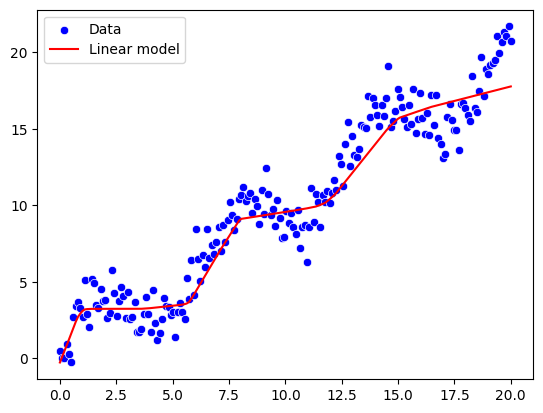

In [16]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
